In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.stats import linregress
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import seaborn as sns



# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

# ÎèÖÎ¶Ω Î≥ÄÏàòÎ≥Ñ Í¥ÄÏ§ëÏàòÏôÄÏùò Ïú†ÏùòÎØ∏ÏÑ± ÌôïÏù∏

## 1. Í∏∞Ïò®(ÎÇ†Ïî®)ÏôÄ Í¥ÄÏ§ëÏàòÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù

Î™©Ìëú
:Í≤ΩÍ∏∞Ïãú Ïò®ÎèÑÍ∞Ä Í¥ÄÏ§ë ÏàòÏóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ Î∂ÑÏÑùÌïòÏó¨, ÎÇ†Ïî® Ï°∞Í±¥Ïù¥ Í¥ÄÏ§ë Ïàò Î≥ÄÌôîÏóê Ï§ëÏöîÌïú ÏöîÏù∏Ïù∏ÏßÄ ÌååÏïÖ.

- Î∂ÑÏÑù Î∞©Î≤ï: ÏÉÅÍ¥Ä Î∂ÑÏÑù: Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò Í∞ÑÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Í≥ÑÏÇ∞.
- Îã®Ïàú ÌöåÍ∑Ä Î∂ÑÏÑù: Í∏∞Ïò®Ïù¥ Í¥ÄÏ§ëÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ï†ïÎüâÏ†ÅÏúºÎ°ú Ï∏°Ï†ï.

->  Í∏∞ÎåÄ Í≤∞Í≥º:
Í∏∞Ïò®Ïù¥ ÎÜíÍ±∞ÎÇò Ïò®ÌôîÌïú ÎÇ†Ïî®ÏóêÏÑú Í¥ÄÏ§ëÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Í≤ΩÌñ• ÌôïÏù∏.


ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.06
ÌöåÍ∑ÄÏãù: Í¥ÄÏ§ëÏàò = 73.92 * Í∏∞Ïò® + 8952.17
ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®(MSE): 44889314.54
Í≤∞Ï†ï Í≥ÑÏàò(R¬≤): 0.00


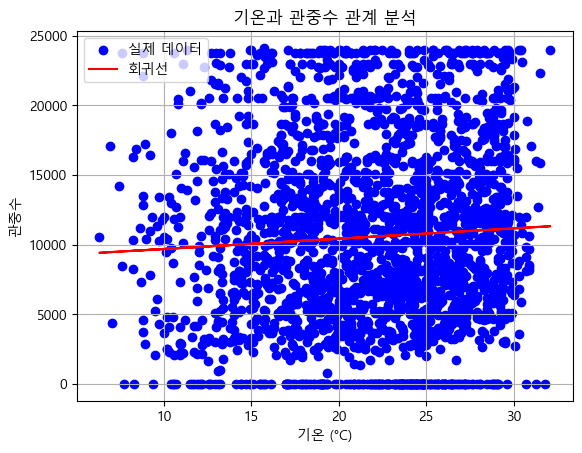

In [12]:
file_path = "ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx"
df = pd.read_excel(file_path)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
#print(df.head())

# Î∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú (Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò)
df = df[['Í∏∞Ïò®', 'Í¥ÄÏ§ëÏàò']]

temperature_col = "Í∏∞Ïò®"  # Í∏∞Ïò® Ïª¨ÎüºÎ™Ö
audience_col = "Í¥ÄÏ§ëÏàò"  # Í¥ÄÏ§ëÏàò Ïª¨ÎüºÎ™Ö

df[temperature_col] = df[temperature_col].replace(',', '', regex=True).astype(float)
df[audience_col] = df[audience_col].replace(',', '', regex=True).astype(float)

# ÏÉÅÍ¥Ä Î∂ÑÏÑù (Pearson correlation)
correlation, _ = pearsonr(df[temperature_col], df[audience_col])
print(f"ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.2f}")

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = df[[temperature_col]]  # ÎèÖÎ¶Ω Î≥ÄÏàò (Í∏∞Ïò®)
y = df[audience_col]  # Ï¢ÖÏÜç Î≥ÄÏàò (Í¥ÄÏ§ëÏàò)

# Î™®Îç∏ ÏÉùÏÑ± Î∞è ÌïôÏäµ
model = LinearRegression()
model.fit(X, y)

# ÌöåÍ∑Ä Í≤∞Í≥º
y_pred = model.predict(X)
slope = model.coef_[0]  # Í∏∞Ïö∏Í∏∞
intercept = model.intercept_  # Ï†àÌé∏
mse = mean_squared_error(y, y_pred)  # ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®
r2 = r2_score(y, y_pred)  # Í≤∞Ï†ï Í≥ÑÏàò

# Í≤∞Í≥º Ï∂úÎ†•
print(f"ÌöåÍ∑ÄÏãù: Í¥ÄÏ§ëÏàò = {slope:.2f} * Í∏∞Ïò® + {intercept:.2f}") # Í¥ÄÏ§ëÏàò = 0.00 * Í∏∞Ïò® + 0.00
print(f"ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®(MSE): {mse:.2f}") # ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®(MSE): 0.00
print(f"Í≤∞Ï†ï Í≥ÑÏàò(R¬≤): {r2:.2f}") # Í≤∞Ï†ï Í≥ÑÏàò(R¬≤): 0.00

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.scatter(df[temperature_col], df[audience_col], color='blue', label='Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞')
plt.plot(df[temperature_col], y_pred, color='red', label='ÌöåÍ∑ÄÏÑ†')
plt.title('Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò Í¥ÄÍ≥Ñ Î∂ÑÏÑù')
plt.xlabel('Í∏∞Ïò® (¬∞C)')
plt.ylabel('Í¥ÄÏ§ëÏàò')
plt.legend()
plt.grid(True)
plt.show()



ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Í±∞Ïùò ÏóÜÍ≥† Ïò§Ï∞®Í∞Ä ÎÑàÎ¨¥ ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Í∏∞Ïò®Ïù¥ Í¥ÄÏ§ëÏàòÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÎã§Í≥† ÌåêÎã®.

-> Î≥¥Ï°∞Ï†Å Î≥ÄÏàòÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ 5ÎèÑ Í∞ÑÍ≤©ÏúºÎ°ú ÌèâÍ∑† Í¥ÄÏ§ëÏàò Í≥ÑÏÇ∞

   Í∏∞Ïò® Í∑∏Î£π        ÌèâÍ∑† Í¥ÄÏ§ëÏàò
0    5.0  10319.222222
1   10.0   9809.715447
2   15.0  10712.557439
3   20.0  10042.378906
4   25.0  11198.251029
5   30.0  12249.476190


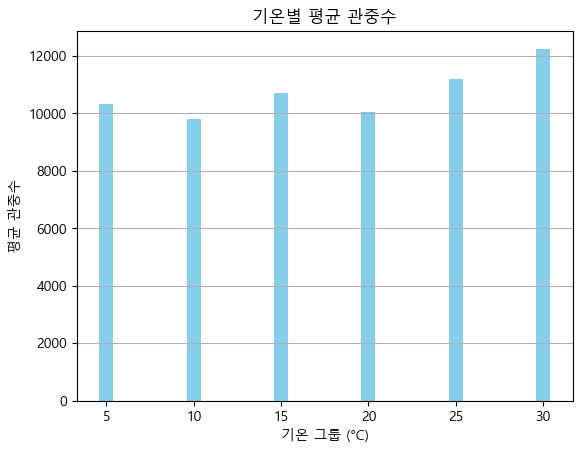

In [15]:
# Í∏∞Ïò®ÏùÑ 5ÎèÑ Í∞ÑÍ≤©ÏúºÎ°ú Í∑∏Î£πÌôî
df['Í∏∞Ïò® Í∑∏Î£π'] = (df['Í∏∞Ïò®'] // 5) * 5  # Í∏∞Ïò®ÏùÑ 5Î°ú ÎÇòÎàÑÍ≥† ÎÇ¥Î¶º Ï≤òÎ¶¨ÌïòÏó¨ Í∑∏Î£πÌôî

# Í∑∏Î£πÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Í≥ÑÏÇ∞
grouped = df.groupby('Í∏∞Ïò® Í∑∏Î£π')['Í¥ÄÏ§ëÏàò'].mean().reset_index()
grouped.rename(columns={'Í¥ÄÏ§ëÏàò': 'ÌèâÍ∑† Í¥ÄÏ§ëÏàò'}, inplace=True)

# Í≤∞Í≥º Ï∂úÎ†•
print(grouped)

# Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî
plt.bar(grouped['Í∏∞Ïò® Í∑∏Î£π'], grouped['ÌèâÍ∑† Í¥ÄÏ§ëÏàò'], color='skyblue')
plt.title('Í∏∞Ïò®Î≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.xlabel('Í∏∞Ïò® Í∑∏Î£π (¬∞C)')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(axis='y')
plt.show()


Í≤ΩÍ∏∞Ïãú Ïò®ÎèÑÍ∞Ä Í¥ÄÏ§ëÏàòÏóê Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï¥ÏÑú Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàòÏùò ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌñàÎã§. ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥º, Îëê Î≥ÄÏàòÍ∞ÑÏùò ÏÑ†Ìòï ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º ÏÑ§Î™ÖÌï¥Ï£ºÎäî ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Í±∞Ïùò 0Ïóê ÏàòÎ†¥ÌïòÎäî 0.06ÏúºÎ°ú, ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§. Ï¶â, Í¥ÄÏ§ëÏàòÏùò Î≥ÄÎèôÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥ÏÑúÎäî Îã§Î•∏ Î≥ÄÏàòÎ•º Í≥†Î†§Ìï¥Ïïº Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§. 

## 2. ÌòÑÏû• Ïù¥Î≤§Ìä∏ Ïú†Î¨¥ÏôÄ Í¥ÄÏ§ëÏàòÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù

Î∂ÑÏÑù Î∞©Î≤ï:
- t-Í≤ÄÏ†ï: Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Ï∞®Ïù¥ Î∂ÑÏÑù.
- ANOVA: Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ìö®Í≥ºÏÑ± Í≤ÄÏ¶ù.

-> Í∏∞ÎåÄ Í≤∞Í≥º: Ïù¥Î≤§Ìä∏(Ïòà: Î∂àÍΩÉÎÜÄÏù¥, ÏÖÄÎüΩ ÏãúÍµ¨)Í∞Ä Í¥ÄÏ§ëÏàòÏóê Í∏çÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Í≤ÉÏúºÎ°ú ÏòàÏÉÅ.


          ÎÇ†Ïßú    Ìôà      Í¥ÄÏ§ëÏàò  ÌòÑÏû•Ïù¥Î≤§Ìä∏
0 2022-04-02   ÎëêÏÇ∞  16271.0      0
1 2022-04-02  KIA  16908.0      0
2 2022-04-02   ÌÇ§ÏõÄ   8257.0      0
3 2022-04-02   NC   7814.0      0
4 2022-04-02   KT  17057.0      0
Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† Í¥ÄÏ§ë Ïàò:
Ïù¥Î≤§Ìä∏ ÏûàÎäî ÎÇ† ÌèâÍ∑† Í¥ÄÏ§ë Ïàò: 12068.11
Ïù¥Î≤§Ìä∏ ÏóÜÎäî ÎÇ† ÌèâÍ∑† Í¥ÄÏ§ë Ïàò: 9947.40
t-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 7.05
p-value: 0.00


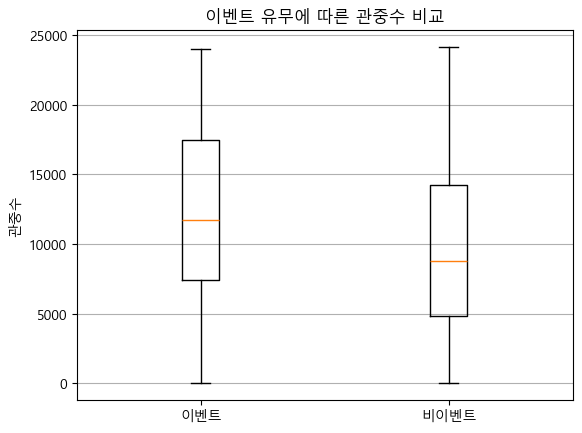

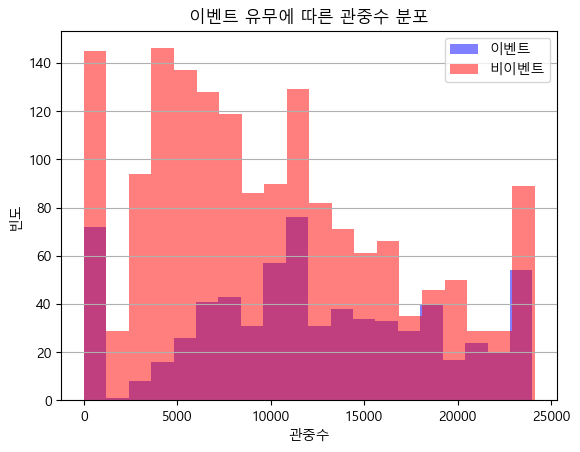

In [38]:
date = 'ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx'
event = 'ÌòÑÏû•Ïù¥Î≤§Ìä∏.xlsx'

df_date = pd.read_excel(date, usecols=['ÎÇ†Ïßú', 'Ìôà','Í¥ÄÏ§ëÏàò'])
df_date['ÎÇ†Ïßú'] = pd.to_datetime(df_date['ÎÇ†Ïßú'])
df_date['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df_date['Í¥ÄÏ§ëÏàò'], errors='coerce').fillna(0) # Í¥ÄÏ§ëÏàò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω

event = pd.read_excel(event)

event_melted = event.melt(id_vars=['ÎÇ†Ïßú'], var_name='Ìôà', value_name='ÌòÑÏû•Ïù¥Î≤§Ìä∏')  # Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨Ï°∞Ìôî

merged_data = pd.merge(df_date, event_melted, on=['ÎÇ†Ïßú', 'Ìôà'], how='inner') # Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©

print(merged_data.head()) # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

# Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ Í¥ÄÏ§ë Ïàò ÎπÑÍµê
event_days = merged_data[merged_data['ÌòÑÏû•Ïù¥Î≤§Ìä∏'] == 1]['Í¥ÄÏ§ëÏàò']
no_event_days = merged_data[merged_data['ÌòÑÏû•Ïù¥Î≤§Ìä∏'] == 0]['Í¥ÄÏ§ëÏàò']

# ÌèâÍ∑† Í¥ÄÏ§ë Ïàò ÎπÑÍµê

print("Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ ÌèâÍ∑† Í¥ÄÏ§ë Ïàò:")
print(f"Ïù¥Î≤§Ìä∏ ÏûàÎäî ÎÇ† ÌèâÍ∑† Í¥ÄÏ§ë Ïàò: {event_days.mean():.2f}")
print(f"Ïù¥Î≤§Ìä∏ ÏóÜÎäî ÎÇ† ÌèâÍ∑† Í¥ÄÏ§ë Ïàò: {no_event_days.mean():.2f}")

# t-Í≤ÄÏ†ï
t_stat, p_value = ttest_ind(event_days, no_event_days)
print(f"t-Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: {t_stat:.2f}")
print(f"p-value: {p_value:.2f}")

# ÏãúÍ∞ÅÌôî
plt.boxplot([event_days, no_event_days])
plt.xticks([1, 2], ['Ïù¥Î≤§Ìä∏', 'ÎπÑÏù¥Î≤§Ìä∏'])
plt.ylabel('Í¥ÄÏ§ëÏàò')
plt.title('Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ Í¥ÄÏ§ëÏàò ÎπÑÍµê')
plt.grid(axis='y')
plt.show()

# Îã§Î•∏ ÏãúÍ∞ÅÌôî 
plt.hist(event_days, bins=20, alpha=0.5, color='b', label='Ïù¥Î≤§Ìä∏')
plt.hist(no_event_days, bins=20, alpha=0.5, color='r', label='ÎπÑÏù¥Î≤§Ìä∏')
plt.legend()
plt.xlabel('Í¥ÄÏ§ëÏàò')
plt.ylabel('ÎπàÎèÑ')
plt.title('Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ Í¥ÄÏ§ëÏàò Î∂ÑÌè¨')
plt.grid(axis='y')
plt.show()

Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎäî Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùå.(ÎπÑÏù¥Î≤§Ìä∏ÏóêÎèÑ Í¥ÄÏ§ëÏàòÍ∞Ä ÎßéÎã§Îäî ÏùòÎØ∏) Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Îùº ÌèâÍ∑† Í¥ÄÏ§ë Ïàò Îç∞Ïù¥ÌÑ∞Îäî Î≥¥Ï°∞ ÎèÑÍµ¨Î°ú ÏÇ¨Ïö©Í∞ÄÎä•Ìï†Í±∞Í∞ôÏùå.

In [ ]:
# Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ìö®Í≥º Î∂ÑÏÑù

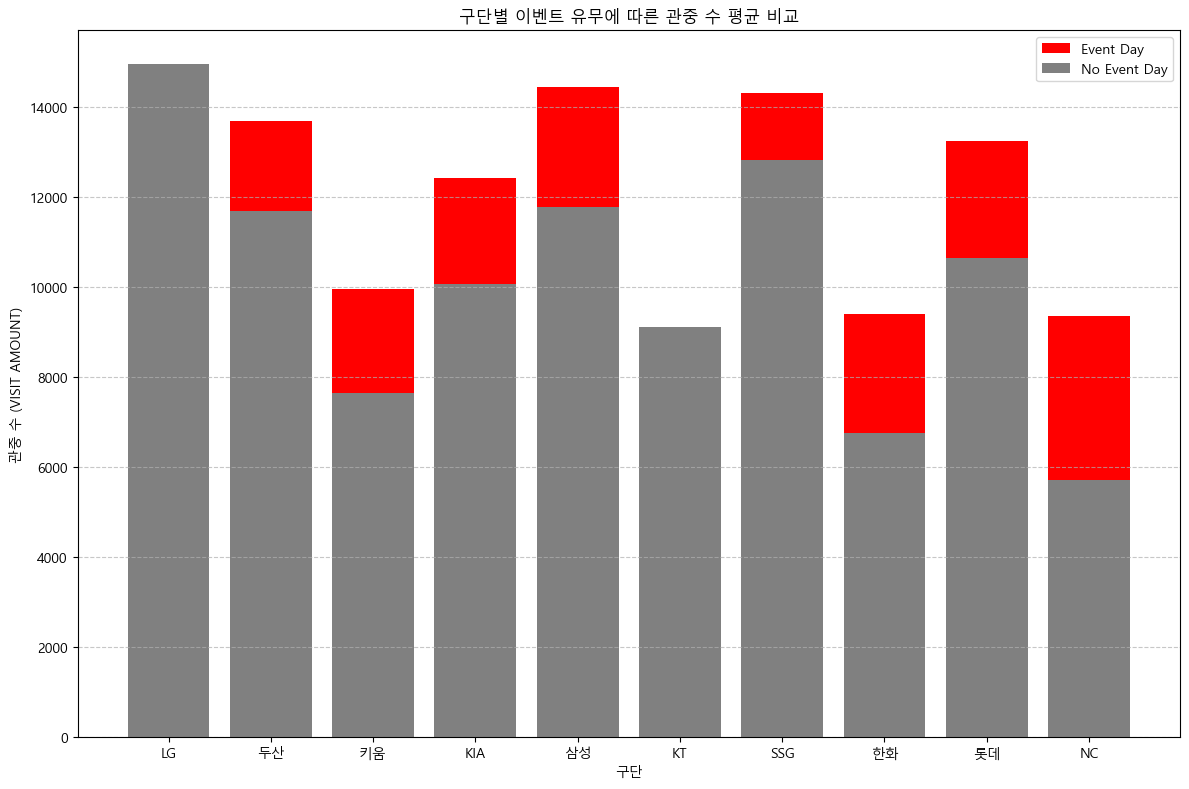

Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ìö®Í≥º Î∂ÑÏÑù Í≤∞Í≥º:
    Íµ¨Îã®     Ïù¥Î≤§Ìä∏_ÏûàÏùå_ÌèâÍ∑†     Ïù¥Î≤§Ìä∏_ÏóÜÏùå_ÌèâÍ∑†       p-value
0   LG  13353.080460  14956.234177  9.026845e-02
1   ÎëêÏÇ∞  13691.821429  11685.967105  6.492966e-02
2   ÌÇ§ÏõÄ   9962.025000   7639.522727  1.877915e-03
3  KIA  12432.794118  10068.247664  5.380060e-02
4   ÏÇºÏÑ±  14439.656716  11774.615385  1.499179e-02
5   KT   8149.359551   9114.804054  1.665953e-01
6  SSG  14314.810526  12835.132867  8.427580e-02
7   ÌïúÌôî   9402.428571   6768.800000  4.963407e-04
8   Î°ØÎç∞  13248.678571  10651.951724  6.524761e-03
9   NC   9360.578947   5707.491124  5.218095e-07


In [ ]:
# Íµ¨Îã® Î¶¨Ïä§Ìä∏ ÏÑ§Ï†ï
teams = ['LG', 'ÎëêÏÇ∞', 'ÌÇ§ÏõÄ', 'KIA', 'ÏÇºÏÑ±', 'KT', 'SSG', 'ÌïúÌôî', 'Î°ØÎç∞', 'NC']

# Step 5: Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ìö®Í≥º Î∂ÑÏÑù
results = []  # Í≤∞Í≥º Ï†ÄÏû•
plt.figure(figsize=(12, 8))

for team in teams:
    team_data = merged_data[merged_data['Ìôà'] == team]
    event_days = team_data[team_data['ÌòÑÏû•Ïù¥Î≤§Ìä∏'] == 1]['Í¥ÄÏ§ëÏàò']
    no_event_days = team_data[team_data['ÌòÑÏû•Ïù¥Î≤§Ìä∏'] == 0]['Í¥ÄÏ§ëÏàò']
    
    # ÌèâÍ∑† ÎπÑÍµê
    event_mean = event_days.mean()
    no_event_mean = no_event_days.mean()
    
    # T-test ÏàòÌñâ
    if len(event_days) > 1 and len(no_event_days) > 1:  # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïú Í≤ΩÏö∞Îßå Ïã§Ìñâ
        t_stat, p_value = ttest_ind(event_days, no_event_days, equal_var=False)
    else:
        t_stat, p_value = None, None
    
    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'Íµ¨Îã®': team,
        'Ïù¥Î≤§Ìä∏_ÏûàÏùå_ÌèâÍ∑†': event_mean,
        'Ïù¥Î≤§Ìä∏_ÏóÜÏùå_ÌèâÍ∑†': no_event_mean,
        'p-value': p_value
    })
    
    # ÏãúÍ∞ÅÌôî (ÎßâÎåÄ Í∑∏ÎûòÌîÑ)
    plt.bar(team, event_mean, color='red', label='Event Day' if team == teams[0] else "")
    plt.bar(team, no_event_mean, color='grey', label='No Event Day' if team == teams[0] else "")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.title("Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ïú†Î¨¥Ïóê Îî∞Î•∏ Í¥ÄÏ§ë Ïàò ÌèâÍ∑† ÎπÑÍµê")
plt.ylabel("Í¥ÄÏ§ë Ïàò (VISIT AMOUNT)")
plt.xlabel("Íµ¨Îã®")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Í≤∞Í≥º Ï∂úÎ†•
results_df = pd.DataFrame(results)
print("Íµ¨Îã®Î≥Ñ Ïù¥Î≤§Ìä∏ Ìö®Í≥º Î∂ÑÏÑù Í≤∞Í≥º:")
print(results_df)

In [44]:
## ÌÜµÍ≥Ñ ÏöîÏïΩ

# 1.ÌÇ§ÏõÄ
# Ïù¥Î≤§Ìä∏ ÏûàÏùå ÌèâÍ∑†: 9,962
# Ïù¥Î≤§Ìä∏ ÏóÜÏùå ÌèâÍ∑†: 7,639
# p-value: 0.0018 (Ïú†ÏùòÎØ∏)

# 2.ÏÇºÏÑ±
# Ïù¥Î≤§Ìä∏ ÏûàÏùå ÌèâÍ∑†: 14,440
# Ïù¥Î≤§Ìä∏ ÏóÜÏùå ÌèâÍ∑†: 11,775
# p-value: 0.0149 (Ïú†ÏùòÎØ∏)

# 3.ÌïúÌôî
# Ïù¥Î≤§Ìä∏ ÏûàÏùå ÌèâÍ∑†: 9,402
# Ïù¥Î≤§Ìä∏ ÏóÜÏùå ÌèâÍ∑†: 6,769
# p-value: 0.0005 (Ïú†ÏùòÎØ∏)

# 4.Î°ØÎç∞
# Ïù¥Î≤§Ìä∏ ÏûàÏùå ÌèâÍ∑†: 13,249
# Ïù¥Î≤§Ìä∏ ÏóÜÏùå ÌèâÍ∑†: 10,652
# p-value: 0.0065 (Ïú†ÏùòÎØ∏)

# 5.NC
# Ïù¥Î≤§Ìä∏ ÏûàÏùå ÌèâÍ∑†: 9,361
# Ïù¥Î≤§Ìä∏ ÏóÜÏùå ÌèâÍ∑†: 5,707
# p-value: 5.2e-07 (Îß§Ïö∞ Ïú†ÏùòÎØ∏)

5Í∞ú Íµ¨Îã®(ÌÇ§ÏõÄ, ÏÇºÏÑ±, ÌïúÌôî, Î°ØÎç∞, NC)ÏùÄ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî Í≤ΩÏö∞ Í¥ÄÏ§ëÏàòÍ∞Ä Îçî ÎßéÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÏúºÎ©∞, Ïù¥Îäî Îã®ÏàúÌïú Ïö∞Ïó∞Ïù¥ ÏïÑÎãå p-valueÏùò Í∞íÏù¥ <0.05Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Î°ú ÏûÖÏ¶ùÎêòÏóàÎã§. ÌäπÌûà NC, ÌïúÌôî, Î°ØÎç∞ÏóêÏÑú Ïù¥Î≤§Ìä∏ Ìö®Í≥ºÍ∞Ä ÎöúÎ†∑ÌïòÍ≤å ÎÇòÌÉÄÎÇòÎ©∞ Ïù¥Îäî ÏàòÎèÑÍ∂åÏù¥ ÏïÑÎãå ÏßÄÎ∞© Íµ¨Îã®ÏùºÏàòÎ°ù Ïù¥Î≤§Ìä∏Ïùò Ïú†Î¨¥Í∞Ä Í¥ÄÏ§ëÏàòÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Í≥† Î≥º Ïàò ÏûàÎã§. NC ÌåÄÏùò Í≤ΩÏö∞ p-value(0.00000052)Î°ú Îß§Ïö∞ ÎÇÆÏïÑ, Ïù¥Î≤§Ìä∏Í∞Ä Í¥ÄÏ§ëÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•Ïù¥ Îß§Ïö∞ Í∞ïÎ†•ÌïòÎ©∞ Ïù¥Î≤§Ìä∏Í∞Ä ÏûàÎäî ÎÇ† Í¥ÄÏ§ëÏàòÍ∞Ä ÏïΩ 3,654Î™Ö Îçî ÎßéÎã§Í≥† ÎìúÎü¨ÎÇúÎã§. Í≤∞Í≥ºÏ†ÅÏúºÎ°ú, ÏßÄÎ∞© Íµ¨Îã®Ïùò Í≤ΩÏö∞ Îã§ÏñëÌïú Ïù¥Î≤§Ìä∏Î•º Ìå¨ ÌäπÏÑ±Ïóê ÎßûÍ≤å Ï†ÑÎûµÏ†ÅÏúºÎ°ú Í∏∞ÌöçÌïúÎã§Î©¥ Í∑∏ Ìö®Í≥ºÏÑ±ÏùÄ ÎçîÏö± ÎëêÎìúÎü¨Ïßà Ïàò ÏûàÎã§Í≥† ÌåêÎã®Ìï† Ïàò ÏûàÎã§.

## 3. Î≤ÑÏ¶àÎüâÍ≥º Í¥ÄÏ§ëÏàòÏùò Í¥ÄÍ≥Ñ Î∂ÑÏÑù

Î∂ÑÏÑù Î∞©Î≤ï:
ÏÉÅÍ¥Ä Î∂ÑÏÑù: Î≤ÑÏ¶àÎüâ(ÌÇ§ÏõåÎìú Ïñ∏Í∏âÎüâ, Ïú†ÌäúÎ∏å DPI)Í≥º Í¥ÄÏ§ëÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞.

Îã§Ï§ë ÌöåÍ∑Ä Î∂ÑÏÑù: Î≤ÑÏ¶àÎüâÏù¥ Í¥ÄÏ§ëÏàòÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•ÏùÑ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞Ä.

-> Í∏∞ÎåÄ Í≤∞Í≥º:
ÎÜíÏùÄ Î≤ÑÏ¶àÎüâÏù¥ Í¥ÄÏ§ëÏàò Ï¶ùÍ∞ÄÏôÄ Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÏÑ±ÏùÑ Î≥¥Ïùº Í≤ÉÏúºÎ°ú ÏòàÏÉÅ.


In [45]:
# ÎÇ†ÏßúÏôÄ ÌåÄ Ïù¥Î¶ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞Î•º Î≥ëÌï©ÌïòÍ≥†, ÌôàÍ≥º ÏõêÏ†ï ÌåÄÏùò Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ìï©Í≥Ñ Í≥ÑÏÇ∞

In [3]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
ÌÜµÌï©Î¨∏ÏÑú1 = pd.read_excel("Í¥ÄÏ§ëÏàò.xlsx")  # ÌÜµÌï©Î¨∏ÏÑú1 ÌååÏùº
Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ = pd.read_excel("Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ïñ∏Í∏âÎüâ.xlsx")  # Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ ÌååÏùº

# Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ ÌååÏùºÏùÑ ÌåÄ Ïù¥Î¶ÑÎ≥ÑÎ°ú Ïû¨Íµ¨ÏÑ±
# ÌïÑÏöîÌïú Ïó¥Îßå ÎÇ®Í∏∞Í∏∞ (ÎÇ†Ïßú + ÌåÄ Ïù¥Î¶ÑÎ≥Ñ Îç∞Ïù¥ÌÑ∞)
Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞_long = pd.melt(
    Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞,
    id_vars=['ÎÇ†Ïßú'], 
    var_name='ÌåÄ', 
    value_name='Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'
)

# ÎÇ†ÏßúÏôÄ ÌåÄÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ìôà ÌåÄÏùò Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
ÌÜµÌï©Î¨∏ÏÑú1 = ÌÜµÌï©Î¨∏ÏÑú1.merge(
    Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞_long, 
    left_on=['ÎÇ†Ïßú', 'Ìôà'], 
    right_on=['ÎÇ†Ïßú', 'ÌåÄ'], 
    how='left'
).rename(columns={'Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞': 'Ìôà_Î≤ÑÏ¶à'})

# ÎÇ†ÏßúÏôÄ ÌåÄÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏõêÏ†ï ÌåÄÏùò Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
ÌÜµÌï©Î¨∏ÏÑú1 = ÌÜµÌï©Î¨∏ÏÑú1.merge(
    Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞_long, 
    left_on=['ÎÇ†Ïßú', 'ÏõêÏ†ï'], 
    right_on=['ÎÇ†Ïßú', 'ÌåÄ'], 
    how='left'
).rename(columns={'Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞': 'ÏõêÏ†ï_Î≤ÑÏ¶à'})

# Ï¥ù Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Íµ¨ÌïòÍ∏∞
ÌÜµÌï©Î¨∏ÏÑú1['Ï¥ù_Î≤ÑÏ¶à'] = ÌÜµÌï©Î¨∏ÏÑú1['Ìôà_Î≤ÑÏ¶à'].fillna(0) + ÌÜµÌï©Î¨∏ÏÑú1['ÏõêÏ†ï_Î≤ÑÏ¶à'].fillna(0)

# Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞ (Ï§ëÎ≥µÎêú ÌåÄ Ïó¥ Ï†úÍ±∞)
ÌÜµÌï©Î¨∏ÏÑú1 = ÌÜµÌï©Î¨∏ÏÑú1.drop(columns=['ÌåÄ_x', 'ÌåÄ_y'])

# Í≤∞Í≥º ÌôïÏù∏
print(ÌÜµÌï©Î¨∏ÏÑú1.head())

# Í≤∞Í≥º Ï†ÄÏû• (ÏÉà ÌååÏùºÎ°ú Ï†ÄÏû•)
ÌÜµÌï©Î¨∏ÏÑú1.to_excel("Í≤ΩÍ∏∞ÌÜµÌï©Î≤ÑÏ¶à.xlsx", index=False)

          ÎÇ†Ïßú    Ìôà Unnamed: 2   ÏõêÏ†ï    Í¥ÄÏ§ëÏàò     Ìôà_Î≤ÑÏ¶à    ÏõêÏ†ï_Î≤ÑÏ¶à     Ï¥ù_Î≤ÑÏ¶à
0 2022-04-02   ÎëêÏÇ∞         VS   ÌïúÌôî  16271  20735.0  25855.0  46590.0
1 2022-04-02  KIA         VS   LG  16908  33629.0   9303.0  42932.0
2 2022-04-02   ÌÇ§ÏõÄ         VS   Î°ØÎç∞   8257  14351.0  31047.0  45398.0
3 2022-04-02   NC         VS  SSG   7814  16862.0  20852.0  37714.0
4 2022-04-02   KT         VS   ÏÇºÏÑ±  17057   6028.0  25215.0  31243.0


Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ë Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º:
- ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.480
- P-value: 0.000


C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

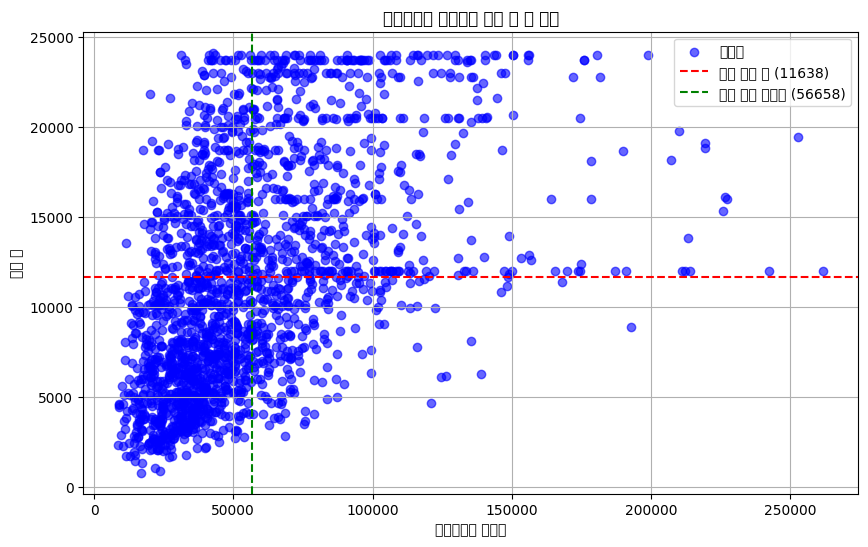

In [10]:
# Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ëÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù


data = pd.read_csv("Í≤ΩÍ∏∞ÌÜµÌï©Î≤ÑÏ¶à.csv")
data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'] = pd.to_numeric(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'], errors='coerce')
data['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(data['Í¥ÄÏ§ëÏàò'], errors='coerce')

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
data = data.dropna()

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation, p_value = pearsonr(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'], data['Í¥ÄÏ§ëÏàò'])

# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
print("Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ë Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º:")
print(f"- ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")
print(f"- P-value: {p_value:.3f}")

# ÏãúÍ∞ÅÌôî (ÏÇ∞Ï†êÎèÑ)
plt.figure(figsize=(10, 6))
plt.scatter(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'], data['Í¥ÄÏ§ëÏàò'], alpha=0.6, color='blue', label='Îç∞Ïù¥ÌÑ∞')
plt.title("Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ïñ∏Í∏âÎüâÍ≥º Í¥ÄÏ§ë Ïàò Í∞Ñ Í¥ÄÍ≥Ñ")
plt.xlabel("Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ïñ∏Í∏âÎüâ")
plt.ylabel("Í¥ÄÏ§ë Ïàò")
plt.axhline(data['Í¥ÄÏ§ëÏàò'].mean(), color='red', linestyle='--', label=f'ÌèâÍ∑† Í¥ÄÏ§ë Ïàò ({data["Í¥ÄÏ§ëÏàò"].mean():.0f})')
plt.axvline(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'].mean(), color='green', linestyle='--', label=f'ÌèâÍ∑† Î≤ÑÏ¶à Ïñ∏Í∏âÎüâ ({data["Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞"].mean():.0f})')
plt.grid(True)
plt.legend()
plt.show()

p-valueÍ∞íÏù¥ Í±∞Ïùò 0Ïóê ÏàòÎ†¥ÌïòÏó¨ ÎÑàÎ¨¥ ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨ÌÜµÍ≥ÑÎ•º ÌôïÏù∏Ìï† ÌïÑÏöîÍ∞Ä ÏûàÏùå

In [11]:
data.head()

ÎÇ†Ïßú    Ìôà Unnamed: 2   ÏõêÏ†ï      Í¥ÄÏ§ëÏàò     Ìôà_Î≤ÑÏ¶à    ÏõêÏ†ï_Î≤ÑÏ¶à  Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞
0  2022-04-02   ÎëêÏÇ∞         VS   ÌïúÌôî  16271.0  20735.0  25855.0  46590
1  2022-04-02  KIA         VS   LG  16908.0  33629.0   9303.0  42932
2  2022-04-02   ÌÇ§ÏõÄ         VS   Î°ØÎç∞   8257.0  14351.0  31047.0  45398
3  2022-04-02   NC         VS  SSG   7814.0  16862.0  20852.0  37714
4  2022-04-02   KT         VS   ÏÇºÏÑ±  17057.0   6028.0  25215.0  31243

In [12]:
data.describe()

Í¥ÄÏ§ëÏàò           Ìôà_Î≤ÑÏ¶à          ÏõêÏ†ï_Î≤ÑÏ¶à          Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞
count   2027.000000    2027.000000    2027.000000    2027.000000
mean   11637.510607   29245.286630   27413.190429   56658.477060
std     6154.486101   22869.435614   22319.685835   34436.932206
min      774.000000    2073.000000    1625.000000    8744.000000
25%     6525.500000   15321.500000   13853.500000   33438.000000
50%    10884.000000   23186.000000   20953.000000   47902.000000
75%    16000.000000   35710.500000   34706.500000   71039.000000
max    24132.000000  237815.000000  194506.000000  261707.000000

Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ ÌèâÍ∑†Í∞íÍ≥º Ï§ëÏïôÍ∞íÏùò Ï∞®Ïù¥Í∞Ä ÎÑàÎ¨¥ ÌÅ¨Í∏∞ÎïåÎ¨∏Ïóê Í∑πÎã®ÏπòÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Í≥† ÌåêÎã®.

In [ ]:
#Í∑πÎã®ÏπòÏùò ÏòÅÌñ•ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎìúÎäî Î°úÍ∑∏Î≥ÄÌôòÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò(Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì¶)

data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞_log'] = np.log1p(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'])  # log(1 + x)
data['Í¥ÄÏ§ëÏàò_log'] = np.log1p(data['Í¥ÄÏ§ëÏàò'])


In [20]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
correlation, p_value = pearsonr(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞_log'], data['Í¥ÄÏ§ëÏàò_log'])
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂úÎ†•
print(f"Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ë Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º: {correlation}, {p_value} ")


Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ë Ïàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò Î∂ÑÏÑù Í≤∞Í≥º: 0.545491709753868, 1.5939567428292544e-157 


In [17]:
spearman_corr, spearman_p = spearmanr(data['Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞'], data['Í¥ÄÏ§ëÏàò'])
print(f"Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: {spearman_corr}, p-value: {spearman_p}")


Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.5482341052736396, p-value: 2.0828510142586967e-159


Î°úÍ∑∏ Î≥ÄÌôò ÌõÑ ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò(0.545)ÏôÄ Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥ÄÍ≥ÑÏàò(0.548)Í∞Ä Îß§Ïö∞ Ïú†ÏÇ¨ÌïòÍ≤å ÎÇòÌÉÄÎÇ¨Îã§. Ïù¥Îäî Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ÏôÄ Í¥ÄÏ§ëÏàò Í∞ÑÏùò Í¥ÄÍ≥ÑÏùò Í∑πÎã®ÏπòÏùò ÏòÅÌñ•Ïù¥ ÏµúÏÜåÌôîÎêòÏóàÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§. Îëê Í∞íÏùÄ Î™®Îëê 0.5 Ïù¥ÏÉÅÏúºÎ°ú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù¥Î©∞, p-valueÎäî Í∞ÅÍ∞Å 1.59w-157Í≥º 2.08e-159Î°ú Îß§Ïö∞ ÏûëÏùÄ ÏàòÏπòÍ∞Ä ÎÇòÏôîÍ∏∞ ÎïåÎ¨∏Ïóê Î≤ÑÏ¶àÎüâÍ≥º Í¥ÄÏ§ëÏàòÎäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®Ïù¥ ÏûÖÏ¶ùÎêòÏóàÏäµÎãàÎã§. Í≤∞Í≥ºÏ†ÅÏúºÎ°ú, Î≤ÑÏ¶àÎüâÏù¥ Ï¶ùÍ∞ÄÌïòÎ©¥ Í¥ÄÏ§ëÏàòÎèÑ Ï¶ùÍ∞ÄÌï®Ïù¥ ÏûÖÏ¶ùÎê®Ïóê Îî∞Îùº Ïò®ÎùºÏù∏ ÎßàÏºÄÌåÖ Î∞è ÌîÑÎ°úÎ™®ÏÖòÏù¥ Ïã§Ï†ú Í¥ÄÏ§ë ÎèôÏõêÏóê Í∏çÏ†ïÏ†ÅÏù∏ Ìö®Í≥ºÎ•º ÎØ∏ÏπúÎã§Í≥† Î≥º Ïàò ÏûàÎã§. Ïù¥Îäî SNS, Ïò®ÎùºÏù∏ Ïª§ÎÆ§ÎãàÌã∞, Í∏∞ÏÇ¨ Îì±ÏùÑ Ï†ÅÍ∑π ÌôúÏö©ÌïòÏó¨ ÌôçÎ≥¥ÌïòÎ©¥ ÌòÑÏû• Í¥ÄÏ§ëÏàòÎ•º ÎÜíÏù¥Îäî Ìö®Í≥ºÏ†ÅÏù∏ Ïó≠Ìï†Ïù¥ Îê† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§.

## 4. ÏöîÏùºÎ≥Ñ/ÏõîÎ≥Ñ ÏùºÏ†ïÍ≥º Í¥ÄÏ§ëÏàò ÌååÏïÖ

Î∞©Î≤ï:
- ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
- ÏãúÍ∞ÅÌôî


In [2]:
df = pd.read_excel('ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx')
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
df['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df['Í¥ÄÏ§ëÏàò'], errors='coerce').fillna(0)  # Í¥ÄÏ§ëÏàò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÍ≤Ω

data = {
    'ÎÇ†Ïßú': pd.date_range(start='2023-06-01', periods=60, freq='D'),
    'Í¥ÄÏ§ëÏàò': [15000 + (i % 7) * 1000 for i in range(60)]  # ÏöîÏùºÎ≥Ñ Ìå®ÌÑ¥
}
df = pd.DataFrame(data)

df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.day_name()  # ÏöîÏùºÎ™Ö (Ïòà: Monday)
df['Ïõî'] = df['ÎÇ†Ïßú'].dt.month  # Ïõî

# ÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑† Í≥ÑÏÇ∞
grouped = df.groupby('ÏöîÏùº')['Í¥ÄÏ§ëÏàò'].mean().reset_index()
grouped = grouped.sort_values('Í¥ÄÏ§ëÏàò', ascending=False)

# Í≤∞Í≥º Ï∂úÎ†•
print(grouped)


          ÏöîÏùº      Í¥ÄÏ§ëÏàò
6  Wednesday  21000.0
5    Tuesday  20000.0
1     Monday  19000.0
3     Sunday  18000.0
2   Saturday  17000.0
0     Friday  16000.0
4   Thursday  15000.0


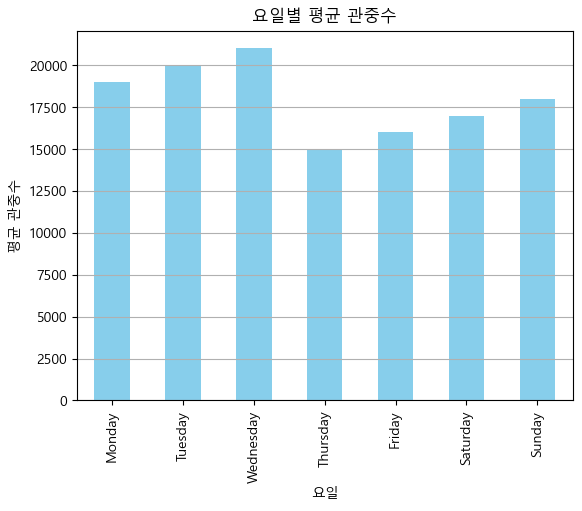

In [4]:
df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.day_name()  # ÏöîÏùºÎ™Ö (Ïòà: Monday)
df['Ïõî'] = df['ÎÇ†Ïßú'].dt.month  # Ïõî (1~12)

# ÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑† ÏãúÍ∞ÅÌôî
weekday_mean = df.groupby('ÏöîÏùº')['Í¥ÄÏ§ëÏàò'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)  # ÏöîÏùº ÏàúÏÑú Ï†ïÎ†¨
weekday_mean.plot(kind='bar', color='skyblue', title='ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(axis='y')
plt.show()

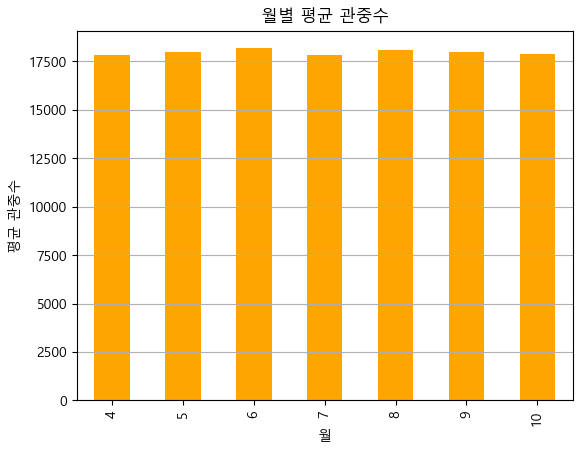

In [5]:
# ÎÇ†Ïßú Î≤îÏúÑ ÌôïÏû• (2023ÎÖÑ 4Ïõî~10Ïõî)
data = {
    'ÎÇ†Ïßú': pd.date_range(start='2023-04-01', end='2023-10-31', freq='D'),
    'Í¥ÄÏ§ëÏàò': [15000 + (i % 7) * 1000 for i in range(214)]  # ÏöîÏùºÎ≥Ñ Ìå®ÌÑ¥
}
df = pd.DataFrame(data)

# ÏöîÏùº Î∞è Ïõî Ï∂îÍ∞Ä
df['ÏöîÏùº'] = df['ÎÇ†Ïßú'].dt.day_name()  # ÏöîÏùºÎ™Ö (Ïòà: Monday)
df['Ïõî'] = df['ÎÇ†Ïßú'].dt.month  # Ïõî (1~12)


# ÏõîÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑† ÏãúÍ∞ÅÌôî
month_mean = df.groupby('Ïõî')['Í¥ÄÏ§ëÏàò'].mean()
month_mean.plot(kind='bar', color='orange', title='ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(axis='y')
plt.show()

Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Îäî Î≥¥Ïù¥ÏßÄ ÏïäÏùå

### ÏãúÍ≥ÑÏó¥ÏòàÏ∏°ÏùÑ ÌÜµÌïú Ï∂îÏù¥ÏòàÏÉÅ

C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\oo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


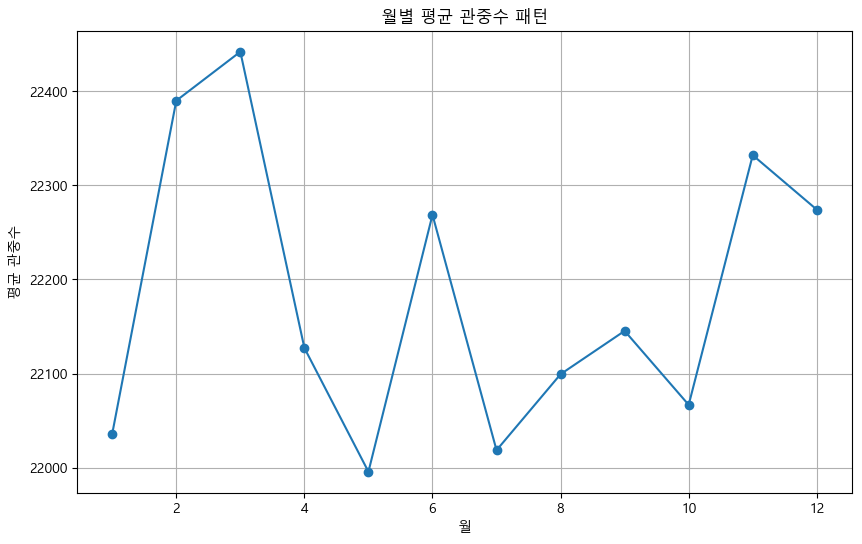

<Figure size 1200x800 with 0 Axes>

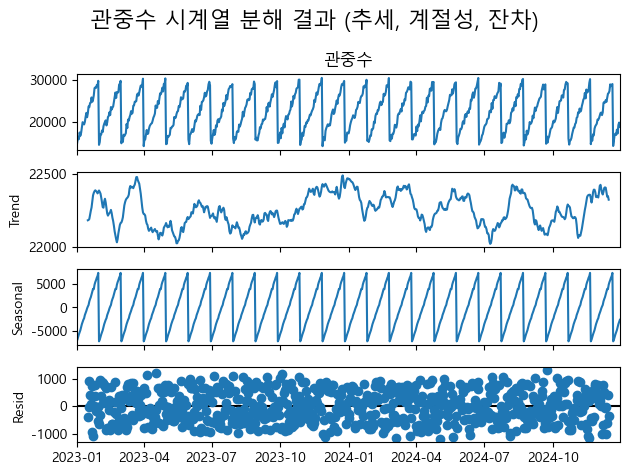

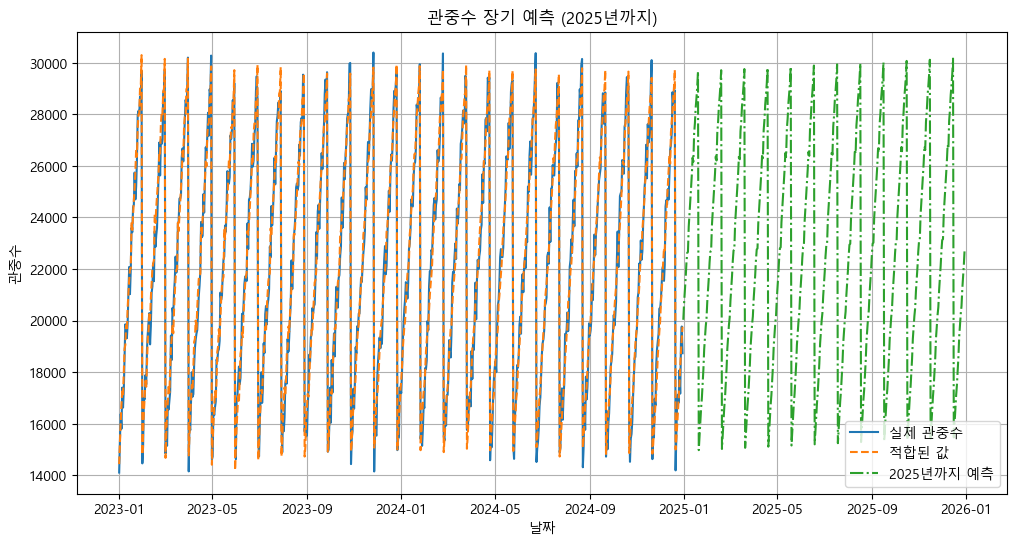

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± (2023ÎÖÑÎ∂ÄÌÑ∞ 2ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞)
data = {
    'ÎÇ†Ïßú': pd.date_range(start='2023-01-01', periods=730, freq='D'),  # 2ÎÖÑÏπò Îç∞Ïù¥ÌÑ∞
    'Í¥ÄÏ§ëÏàò': [15000 + (i % 30) * 500 + np.random.randint(-1000, 1000) for i in range(730)]  # ÏõîÎ≥Ñ Ìå®ÌÑ¥ + ÎÖ∏Ïù¥Ï¶à
}
df = pd.DataFrame(data)

# ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÏÑ§Ï†ï
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
df.set_index('ÎÇ†Ïßú', inplace=True)

# ÏõîÎ≥Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù
df['Ïõî'] = df.index.month
monthly_pattern = df.groupby('Ïõî')['Í¥ÄÏ§ëÏàò'].mean().reset_index()

# ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ (Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ±, ÏûîÏ∞®)
result = seasonal_decompose(df['Í¥ÄÏ§ëÏàò'], model='additive', period=30)

# 2025ÎÖÑÍπåÏßÄ ÏòàÏ∏° (1ÎÖÑ Ï∂îÍ∞Ä ÏòàÏ∏°)
model = ExponentialSmoothing(df['Í¥ÄÏ§ëÏàò'], trend='add', seasonal='add', seasonal_periods=30)
fit_model = model.fit()
forecast = fit_model.forecast(365)  # 2025ÎÖÑÍπåÏßÄ ÏòàÏ∏°

# 1. ÏõîÎ≥Ñ Ìå®ÌÑ¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(monthly_pattern['Ïõî'], monthly_pattern['Í¥ÄÏ§ëÏàò'], marker='o')
plt.title('ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Ìå®ÌÑ¥')
plt.xlabel('Ïõî')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(True)
plt.show()

# 2. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Í¥ÄÏ§ëÏàò ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥ Í≤∞Í≥º (Ï∂îÏÑ∏, Í≥ÑÏ†àÏÑ±, ÏûîÏ∞®)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. 2025ÎÖÑÍπåÏßÄ ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(df['Í¥ÄÏ§ëÏàò'], label='Ïã§Ï†ú Í¥ÄÏ§ëÏàò')
plt.plot(fit_model.fittedvalues, label='Ï†ÅÌï©Îêú Í∞í', linestyle='--')
plt.plot(forecast, label='2025ÎÖÑÍπåÏßÄ ÏòàÏ∏°', linestyle='-.')
plt.title('Í¥ÄÏ§ëÏàò Ïû•Í∏∞ ÏòàÏ∏° (2025ÎÖÑÍπåÏßÄ)')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í¥ÄÏ§ëÏàò')
plt.legend()
plt.grid(True)
plt.show()


# 'ÎåÄÏ†Ñ Íµ¨Ïû•' Í∏∞Ï§ÄÏúºÎ°ú Ïû¨Í≤ÄÏ¶ù

- Î∂ÑÏÑù Î™©Ìëú: ÎåÄÏ†Ñ Íµ¨Îã® ÌôàÍ≤ΩÍ∏∞Î•º Í∏∞Ï§ÄÏúºÎ°ú Ï£ºÏöî ÏöîÏù∏(Í∏∞Ïò®, Ïù¥Î≤§Ìä∏, Î≤ÑÏ¶àÎüâ, ÏöîÏùº/ÏõîÎ≥Ñ ÏùºÏ†ï)Ïùò Ïú†ÏùòÎØ∏ÏÑ± ÌôïÏù∏.
- Î∂ÑÏÑù Î∞©Î≤ï:
- - ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞Î•º ÌïÑÌÑ∞ÎßÅÌïòÏó¨ ÎèôÏùºÌïú Î∞©ÏãùÏúºÎ°ú ÏöîÏù∏ Í≤ÄÏ¶ù.
- - ÎåÄÏ†Ñ Í∏∞Ï§ÄÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÎßå Ï∂îÏ∂ú.


In [75]:
data = pd.read_excel("ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx") 

# Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ: ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_daejeon = data[data['Ïû•ÏÜå'] == 'ÎåÄÏ†Ñ']

# ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df_daejeon.head())

# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(f"ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(df_daejeon)}")


           ÎÇ†Ïßú   Ìôà Unnamed: 2  ÏõêÏ†ï  Ïû•ÏÜå   ÏöîÏùº        ÏãúÍ∞Ñ   Í≤∞Í≥º    Í∏∞Ïò®   Í¥ÄÏ§ëÏàò  TÎßµ Í≤ÄÏÉâÍ±¥Ïàò  \
26 2022-04-08  ÌïúÌôî         VS  KT  ÎåÄÏ†Ñ  Í∏àÏöîÏùº  18:30:00  2:4  13.9  5520     1325   
31 2022-04-09  ÌïúÌôî         VS  KT  ÎåÄÏ†Ñ  ÌÜ†ÏöîÏùº  17:00:00  7:1  18.2  6538     2995   
36 2022-04-10  ÌïúÌôî         VS  KT  ÎåÄÏ†Ñ  ÏùºÏöîÏùº  14:00:00  6:4  18.6  5735     2646   
57 2022-04-15  ÌïúÌôî         VS  LG  ÎåÄÏ†Ñ  Í∏àÏöîÏùº  18:30:00  7:3  12.6  3320      925   
62 2022-04-16  ÌïúÌôî         VS  LG  ÎåÄÏ†Ñ  ÌÜ†ÏöîÏùº  17:00:00  2:6  13.1  8112     2821   

    Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ìï©ÏÇ∞  
26     38108  
31     39983  
36     36756  
57     32513  
62     35232  
ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 235


In [78]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
df_daejeon['Í∏∞Ïò®'] = pd.to_numeric(df_daejeon['Í∏∞Ïò®'], errors='coerce')  # Í∏∞Ïò®ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
df_daejeon['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df_daejeon['Í¥ÄÏ§ëÏàò'], errors='coerce')  # Í¥ÄÏ§ëÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
# df_daejeon['Î≤ÑÏ¶àÎüâ'] = pd.to_numeric(df_daejeon['Î≤ÑÏ¶àÎüâ'], errors='coerce')  # Î≤ÑÏ¶àÎüâÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò

# NaN Í∞í ÌôïÏù∏
print(df_daejeon.isnull().sum())  # NaN Í∞í Í∞úÏàò ÌôïÏù∏

# NaN Í∞í Ï≤òÎ¶¨ (ÌïÑÏöîÏóê Îî∞Îùº ÏÑ†ÌÉù)
df_daejeon = df_daejeon.dropna()  # NaN Í∞í Ï†úÍ±∞
# ÎòêÎäî df_daejeon.fillna(0, inplace=True)  # NaN Í∞íÏùÑ 0ÏúºÎ°ú ÎåÄÏ≤¥


ÎÇ†Ïßú            0
Ìôà             0
Unnamed: 2    0
ÏõêÏ†ï            0
Ïû•ÏÜå            0
ÏöîÏùº            0
ÏãúÍ∞Ñ            0
Í≤∞Í≥º            0
Í∏∞Ïò®            0
Í¥ÄÏ§ëÏàò           0
TÎßµ Í≤ÄÏÉâÍ±¥Ïàò       0
Î≤ÑÏ¶àÎç∞Ïù¥ÌÑ∞ Ìï©ÏÇ∞      0
dtype: int64


C:\Users\oo\AppData\Local\Temp\ipykernel_2540\452910884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daejeon['Í∏∞Ïò®'] = pd.to_numeric(df_daejeon['Í∏∞Ïò®'], errors='coerce')  # Í∏∞Ïò®ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
C:\Users\oo\AppData\Local\Temp\ipykernel_2540\452910884.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daejeon['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df_daejeon['Í¥ÄÏ§ëÏàò'], errors='coerce')  # Í¥ÄÏ§ëÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò


Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.10, p-value: 0.1109


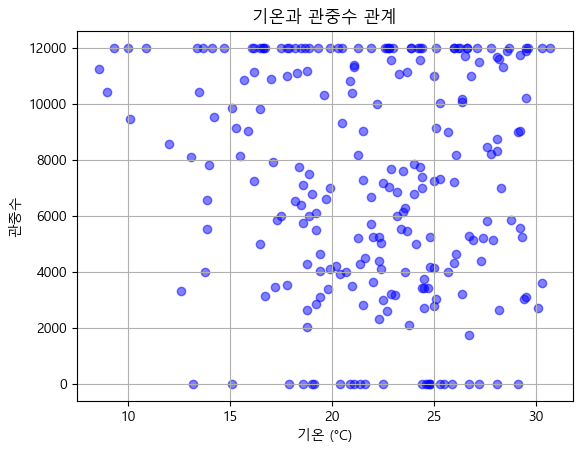

In [80]:
# Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df_daejeon['Í∏∞Ïò®'], df_daejeon['Í¥ÄÏ§ëÏàò'])
print(f"Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.2f}, p-value: {p_value:.4f}")

# ÏãúÍ∞ÅÌôî
plt.scatter(df_daejeon['Í∏∞Ïò®'], df_daejeon['Í¥ÄÏ§ëÏàò'], color='blue', alpha=0.5)
plt.title('Í∏∞Ïò®Í≥º Í¥ÄÏ§ëÏàò Í¥ÄÍ≥Ñ')
plt.xlabel('Í∏∞Ïò® (¬∞C)')
plt.ylabel('Í¥ÄÏ§ëÏàò')
plt.grid(True)


ÏõîÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:
Ïõî
3     12000.000000
4      8157.405405
5      7636.414634
6      7008.461538
7      6952.866667
8      6240.853659
9      5888.305556
10    10269.750000
Name: Í¥ÄÏ§ëÏàò, dtype: float64

ÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:
ÏöîÏùº
Friday       7424.236842
Monday       8971.000000
Saturday     9301.179487
Sunday       8358.097561
Thursday     6113.222222
Tuesday      5666.675676
Wednesday    5658.923077
Name: Í¥ÄÏ§ëÏàò, dtype: float64

ÏõîÎ≥Ñ ANOVA Í≤∞Í≥º: F-ÌÜµÍ≥ÑÎüâ=2.69, p-value=0.0109
ÏöîÏùºÎ≥Ñ ANOVA Í≤∞Í≥º: F-ÌÜµÍ≥ÑÎüâ=5.36, p-value=0.0000


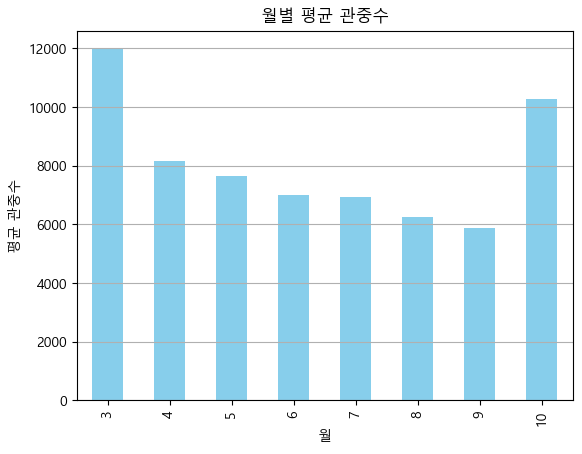

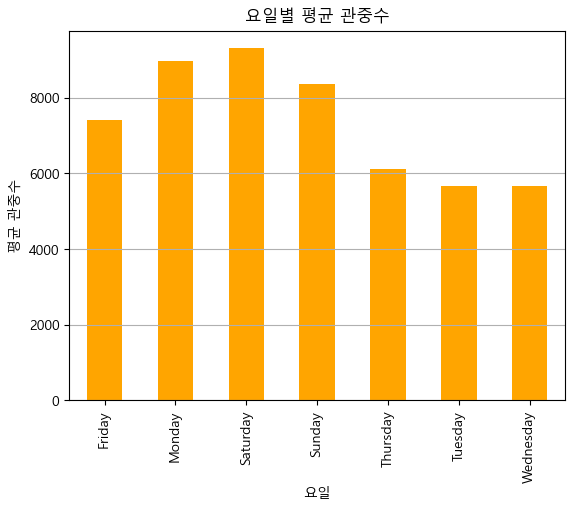

In [ ]:
# ------------------------------
# 1. ÏõîÎ≥Ñ/ÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌååÏïÖ
# ------------------------------

# ÏõîÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†
month_mean = df_daejeon.groupby('Ïõî')['Í¥ÄÏ§ëÏàò'].mean()
print("ÏõîÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:")
print(month_mean)

# ÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†
weekday_mean = df_daejeon.groupby('ÏöîÏùº')['Í¥ÄÏ§ëÏàò'].mean()
print("\nÏöîÏùºÎ≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:")
print(weekday_mean)

# ANOVA - ÏõîÎ≥Ñ
month_groups = df_daejeon.groupby('Ïõî')['Í¥ÄÏ§ëÏàò'].apply(list)
f_stat_month, p_value_month = f_oneway(*month_groups)
print(f"\nÏõîÎ≥Ñ ANOVA Í≤∞Í≥º: F-ÌÜµÍ≥ÑÎüâ={f_stat_month:.2f}, p-value={p_value_month:.4f}")

# ANOVA - ÏöîÏùºÎ≥Ñ
weekday_groups = df_daejeon.groupby('ÏöîÏùº')['Í¥ÄÏ§ëÏàò'].apply(list)
f_stat_weekday, p_value_weekday = f_oneway(*weekday_groups)
print(f"ÏöîÏùºÎ≥Ñ ANOVA Í≤∞Í≥º: F-ÌÜµÍ≥ÑÎüâ={f_stat_weekday:.2f}, p-value={p_value_weekday:.4f}")

# ÏãúÍ∞ÅÌôî
month_mean.plot(kind='bar', color='skyblue', title='ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(axis='y')
plt.show()

weekday_mean.plot(kind='bar', color='orange', title='ÏöîÏùºÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.ylabel('ÌèâÍ∑† Í¥ÄÏ§ëÏàò')
plt.grid(axis='y')
plt.show()


ÏõîÎ≥Ñ 
- Î∂ÑÏÑù Í≤∞Í≥º 3Ïõî(12,000Î™Ö)Í≥º 10Ïõî(10,269Î™Ö)Ïùò Í¥ÄÏ§ëÏàòÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. Ïù¥Îäî ÏãúÏ¶å Í∞úÎßâ Ï¥àÍ∏∞(3Ïõî)ÏôÄ Ìè¨Ïä§Ìä∏ÏãúÏ¶åÏù¥ Ìè¨Ìï®Îêú 10ÏõîÏóê ÎåÄÌïú Í¥ÄÏã¨Ïù¥ ÎÜíÍ∏∞ ÎïåÎ¨∏ÏúºÎ°ú ÏòàÏ∏°ÎêúÎã§. ÎòêÌïú Ïó¨Î¶ÑÏ≤†(6~8Ïõî)ÏóêÎäî Í¥ÄÏ§ëÏàòÍ∞Ä Í∞êÏÜåÌïòÎäî Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Î©∞, Ïù¥Îäî Î¨¥ÎçîÏö¥ ÎÇ†Ïî®ÎÇò Î∞©Ìïô ÏãúÏ¶åÏùò ÏòÅÌñ•Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§Í≥† ÏòàÏÉÅÎêúÎã§.

ÏöîÏùºÎ≥Ñ
- Î∂ÑÏÑù Í≤∞Í≥º Ï£ºÎßê(ÌÜ†ÏöîÏùº, ÏùºÏöîÏùº) Í≤ΩÍ∏∞Ïùò Í¥ÄÏ§ëÏàòÍ∞Ä ÏõîÎì±Ìûà ÎÜíÏúºÎ©∞, ÌäπÌûà ÌÜ†ÏöîÏùº(9,301Î™Ö)Ïù¥ Í∞ÄÏû• ÎÜíÎã§. Ïù¥Îäî Ï£ºÎßê Ïó¨Í∞Ä ÏãúÍ∞ÑÏùò ÌôúÏö©Í≥º Ïù∏Í∏∞ Í≤ΩÍ∏∞ ÏùºÏ†ïÏù¥ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§. Î∞òÎ©¥ ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùºÍ≥º Í∞ôÏùÄ ÌèâÏùº Í≤ΩÍ∏∞Ïùò Í¥ÄÏ§ëÏàòÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇÆÏùÄ Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.

In [ ]:
# ------------------------------
# 2. Ïù¥Î≤§Ìä∏ Ïú†Î¨¥ÏôÄ Í¥ÄÏ§ëÏàò Î∂ÑÏÑù
# ------------------------------

# ÌååÏùº Í≤ΩÎ°ú
date_file = "ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx"
event_file = "ÌòÑÏû•Ïù¥Î≤§Ìä∏.xlsx"

# ÏãúÏ¶å Í≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_date = pd.read_excel(date_file, usecols=['ÎÇ†Ïßú', 'Ìôà', 'Í¥ÄÏ§ëÏàò'])
df_date['ÎÇ†Ïßú'] = pd.to_datetime(df_date['ÎÇ†Ïßú'])  # ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò
df_date['Ïõî'] = df_date['ÎÇ†Ïßú'].dt.month  # Ïõî Í≥ÑÏÇ∞
df_date['ÏöîÏùº'] = df_date['ÎÇ†Ïßú'].dt.day_name()  # ÏöîÏùº Í≥ÑÏÇ∞
df_date['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df_date['Í¥ÄÏ§ëÏàò'], errors='coerce').fillna(0)  # Í¥ÄÏ§ëÏàò Î≥ÄÌôò

# ÌòÑÏû•Ïù¥Î≤§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
event_df = pd.read_excel(event_file, usecols=['ÎÇ†Ïßú', 'ÌïúÌôî'])
event_df['ÎÇ†Ïßú'] = pd.to_datetime(event_df['ÎÇ†Ïßú'])  # ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï© (ÎÇ†ÏßúÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©)
merged_df = pd.merge(df_date, event_df, on='ÎÇ†Ïßú', how='inner')

# ÎåÄÏ†Ñ Íµ¨Îã®(Home='ÌïúÌôî') Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
df_daejeon = merged_df[merged_df['Ìôà'] == 'ÌïúÌôî']

## Í≤ΩÏüÅ Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò Î∂ÑÏÑù 

Î∂ÑÏÑù Ï†àÏ∞®
1. ÎåÄÏ†Ñ Í≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
Ïû•ÏÜå Ïó¥ÏóêÏÑú ÎåÄÏ†ÑÏóê Ìï¥ÎãπÌïòÎäî ÌñâÎßå Ï∂îÏ∂ú.
Ï∂îÏ∂úÎêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏõêÏ†ï Ïó¥Ïóê ÏûàÎäî Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò Î∂ÑÏÑù.
2. Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò ÎπÑÍµê
Í≤ΩÏüÅ Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞.
Íµ¨Îã®Î≥Ñ ÌèâÍ∑† Ï∞®Ïù¥Î•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ANOVA Î∂ÑÏÑù Ï†ÅÏö©.

Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:
ÏõêÏ†ï
KIA    8300.269231
KT     5996.428571
LG     7294.923077
NC     7843.521739
SSG    7765.961538
ÎëêÏÇ∞         7330.72
Î°ØÎç∞     6482.709677
ÏÇºÏÑ±     6503.428571
ÌÇ§ÏõÄ     7310.272727
Name: Í¥ÄÏ§ëÏàò, dtype: object

ANOVA Í≤∞Í≥º:
F-statistic: 0.9270317089223454
P-value: 0.4948400866191799


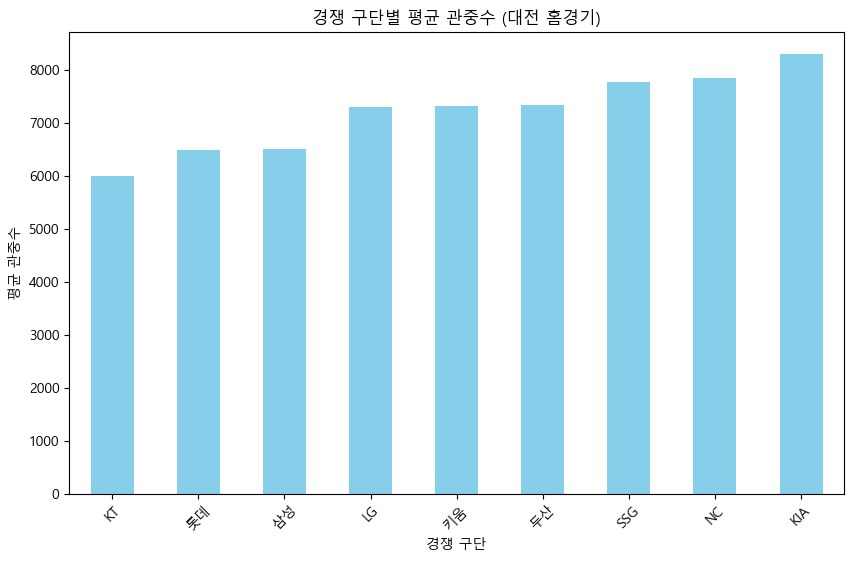

In [98]:
df = pd.read_excel("ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx")

# ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞ Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
daejeon_data = df[df['Ïû•ÏÜå'] == 'ÎåÄÏ†Ñ']

# Í≤ΩÏüÅ Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò Í∑∏Î£πÌôî
grouped = daejeon_data.groupby('ÏõêÏ†ï')['Í¥ÄÏ§ëÏàò']

# Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑† Í≥ÑÏÇ∞
mean_attendance = grouped.mean()
print("Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò ÌèâÍ∑†:")
print(mean_attendance)

# ANOVA Î∂ÑÏÑù
groups = [group['Í¥ÄÏ§ëÏàò'].values for name, group in daejeon_data.groupby('ÏõêÏ†ï')]
f_stat, p_value = stats.f_oneway(*groups)

print("\nANOVA Í≤∞Í≥º:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
mean_attendance.sort_values().plot(kind='bar', color='skyblue')
plt.title("Í≤ΩÏüÅ Íµ¨Îã®Î≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò (ÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞)")
plt.ylabel("ÌèâÍ∑† Í¥ÄÏ§ëÏàò")
plt.xlabel("Í≤ΩÏüÅ Íµ¨Îã®")
plt.xticks(rotation=45)
plt.show()


Í≤ΩÏüÅ Íµ¨Îã®Î≥Ñ Í¥ÄÏ§ëÏàò Ï∞®Ïù¥Îäî Ïã§Ï†úÎ°ú Ï°¥Ïû¨ÌïòÏßÄÎßå, ANOVA Í≤∞Í≥ºÏóê Îî∞Î•¥Î©¥ Ïù¥ Ï∞®Ïù¥Îäî ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏäµÎãàÎã§.

In [101]:
# Í¥ÄÏ§ëÏàò Ïó¥Ïùò Îç∞Ïù¥ÌÑ∞ Ïú†Ìòï ÌôïÏù∏
print(df['Í¥ÄÏ§ëÏàò'].dtype)

# Í¥ÄÏ§ëÏàò Ïó¥ÏùÑ Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÌôò
df['Í¥ÄÏ§ëÏàò'] = pd.to_numeric(df['Í¥ÄÏ§ëÏàò'], errors='coerce')


object


In [102]:
# ÎàÑÎùΩÎêú Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
print(df['Í¥ÄÏ§ëÏàò'].isnull().sum())

# ÎàÑÎùΩ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞ (ÌïÑÏöî Ïãú)
df = df.dropna(subset=['Í¥ÄÏ§ëÏàò'])


1


In [103]:
# Íµ¨Îã®Î≥Ñ ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Í≥ÑÏÇ∞
monthly_avg = df.groupby(['Ïõî', 'ÏõêÏ†ï'])['Í¥ÄÏ§ëÏàò'].mean().reset_index()
print(monthly_avg)


           Ïõî   ÏõêÏ†ï           Í¥ÄÏ§ëÏàò
0    2022-04  KIA   8708.083333
1    2022-04   KT   5605.454545
2    2022-04   LG   7659.571429
3    2022-04   NC   5775.000000
4    2022-04  SSG   5024.000000
..       ...  ...           ...
205  2024-09   Î°ØÎç∞  14932.909091
206  2024-09   ÏÇºÏÑ±  18792.000000
207  2024-09   ÌÇ§ÏõÄ  14195.950000
208  2024-09   ÌïúÌôî  17867.714286
209  2024-10   Î°ØÎç∞  17891.000000

[210 rows x 3 columns]


In [104]:
print(df['Í¥ÄÏ§ëÏàò'].unique())


[16271. 16908.  8257. ... 18727. 21593. 12824.]


C:\Users\oo\AppData\Local\Temp\ipykernel_2540\3941773203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
C:\Users\oo\AppData\Local\Temp\ipykernel_2540\3941773203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ïó∞ÎèÑ'] = df['ÎÇ†Ïßú'].dt.year
C:\Users\oo\AppData\Local\Temp\ipykernel_2540\3941773203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

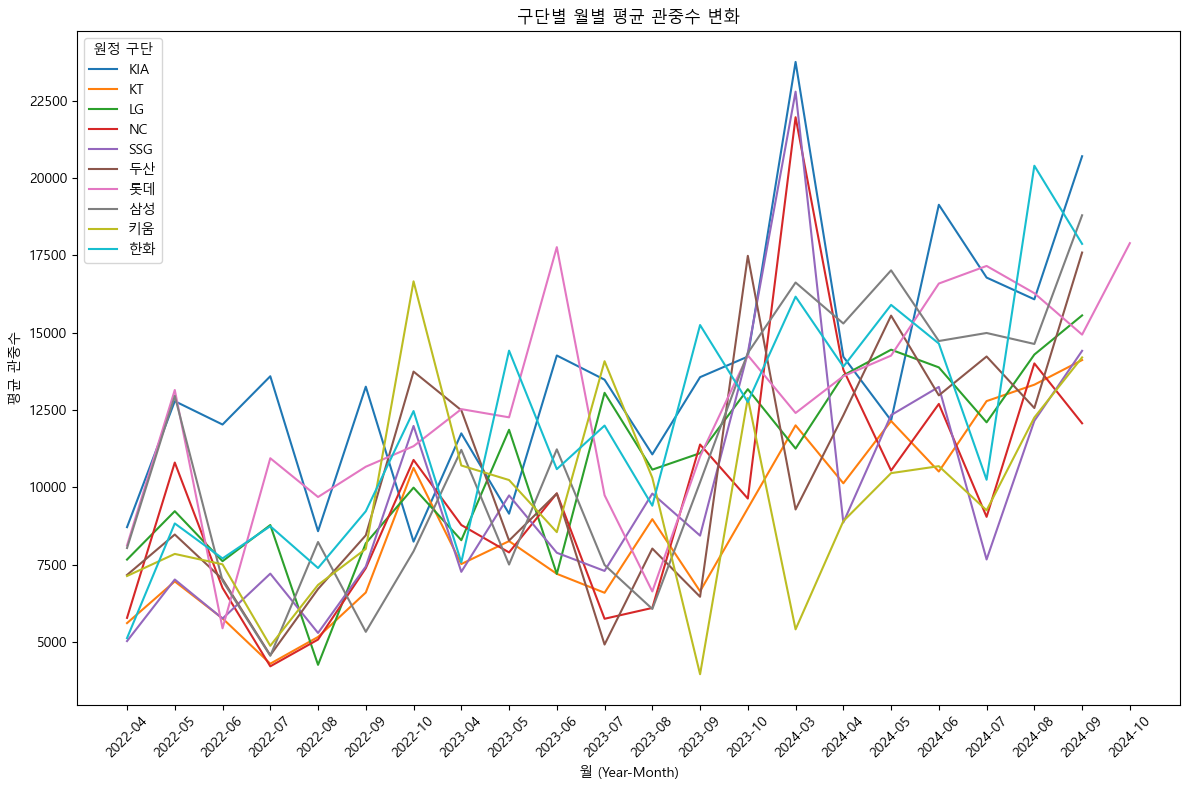

In [105]:
# ÎÇ†Ïßú ÌòïÏãù Î≥ÄÌôò Î∞è Ïó∞ÎèÑ/Ïõî Ï∂îÏ∂ú
df['ÎÇ†Ïßú'] = pd.to_datetime(df['ÎÇ†Ïßú'])
df['Ïó∞ÎèÑ'] = df['ÎÇ†Ïßú'].dt.year
df['Ïõî'] = df['ÎÇ†Ïßú'].dt.to_period('M')  # Ïõî Îã®ÏúÑÎ°ú Î≥ÄÌôò

# Íµ¨Îã®Î≥Ñ ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Í≥ÑÏÇ∞
monthly_avg = df.groupby(['Ïõî', 'ÏõêÏ†ï'])['Í¥ÄÏ§ëÏàò'].mean().reset_index()

# ÏãúÍ≥ÑÏó¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
for team in monthly_avg['ÏõêÏ†ï'].unique():
    team_data = monthly_avg[monthly_avg['ÏõêÏ†ï'] == team]
    plt.plot(team_data['Ïõî'].astype(str), team_data['Í¥ÄÏ§ëÏàò'], label=team)

plt.title("Íµ¨Îã®Î≥Ñ ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàò Î≥ÄÌôî")
plt.xlabel("Ïõî (Year-Month)")
plt.ylabel("ÌèâÍ∑† Í¥ÄÏ§ëÏàò")
plt.xticks(rotation=45)
plt.legend(title="ÏõêÏ†ï Íµ¨Îã®", loc='upper left')
plt.tight_layout()
plt.show()


Íµ¨Îã®Î≥Ñ ÏõîÎ≥Ñ ÌèâÍ∑† Í¥ÄÏ§ëÏàòÏùò Î≥ÄÌôîÎ•º ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïú Í≤∞Í≥ºÎã§. Ïù¥Î•º ÌÜµÌï¥, ÏãúÏ¶å Í∞úÎßâ Ï¥àÍ∏∞(3Ïõî)ÏôÄ Ìè¨Ïä§Ìä∏ÏãúÏ¶åÏù¥ Ìè¨Ìï®Îêú 10ÏõîÏóê KIA, SSG, NC Í≤ΩÍ∏∞ÏóêÏÑú ‚ÄòÎåÄÏ†Ñ ÌôàÍ≤ΩÍ∏∞‚Äô Í¥ÄÏ§ëÏàòÍ∞Ä ÎÜíÏïòÏùåÏùÑ Î≥º Ïàò ÏûàÎã§.


2024-01    18115.500082
2024-02    17745.683533
2024-03    18165.707109
2024-04    18170.199492
2024-05    18108.505617
2024-06    18115.101820
2024-07    18123.310788
2024-08    18121.385479
2024-09    18120.416315
2024-10    18120.810587
2024-11    18120.905385
2024-12    18120.836829
Freq: M, Name: predicted_mean, dtype: float64


ConversionError: Failed to convert value(s) to axis units: array([Period('2024-01', 'M'), Period('2024-02', 'M'),
       Period('2024-03', 'M'), Period('2024-04', 'M'),
       Period('2024-05', 'M'), Period('2024-06', 'M'),
       Period('2024-07', 'M'), Period('2024-08', 'M'),
       Period('2024-09', 'M'), Period('2024-10', 'M'),
       Period('2024-11', 'M'), Period('2024-12', 'M')], dtype=object)

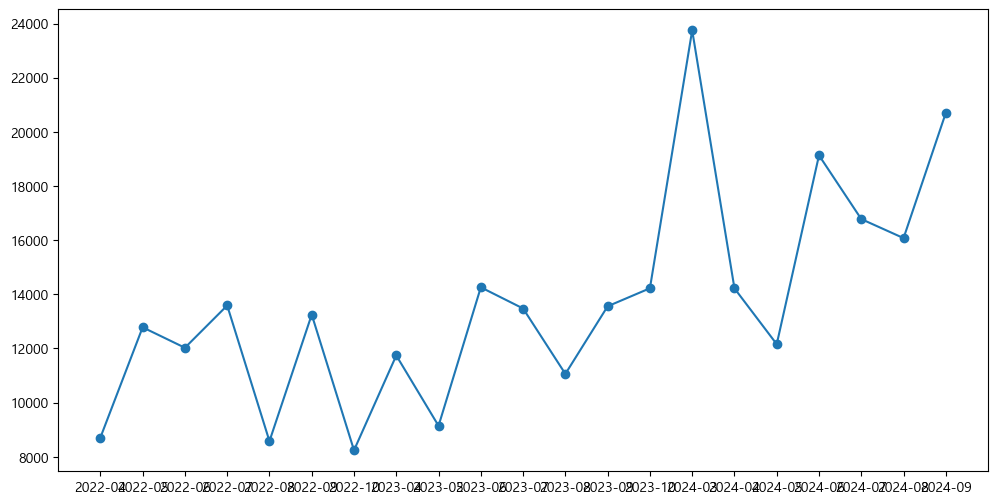

In [110]:
# ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®Îç∏ÎßÅ

# ÌäπÏ†ï Íµ¨Îã® Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ
kia_data = monthly_avg[monthly_avg['ÏõêÏ†ï'] == 'KIA'].set_index('Ïõî')

# ARIMA Î™®Îç∏ Ï†ÅÏö©
model = ARIMA(kia_data['Í¥ÄÏ§ëÏàò'], order=(2, 1, 1))  # (p, d, q) Ï°∞Ï†ï Í∞ÄÎä•
model_fit = model.fit()

# ÏòàÏ∏°
forecast = model_fit.forecast(steps=12)  # 12Í∞úÏõî ÏòàÏ∏°
print(forecast)

# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(kia_data.index.astype(str), kia_data['Í¥ÄÏ§ëÏàò'], marker='o', label='Ïã§Ï†ú')
plt.plot(forecast.index, forecast, marker='o', color='red', linestyle='--', label='ÏòàÏ∏°')
plt.title("KIA ÏõîÎ≥Ñ Í¥ÄÏ§ëÏàò ÏòàÏ∏°")
plt.xlabel("Ïõî (Year-Month)")
plt.ylabel("ÌèâÍ∑† Í¥ÄÏ§ëÏàò")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ÏßÄÏó≠ Í≤ΩÏ†úÏôÄ Íµ¨Îã® Ïó∞Í≥ÑÏÑ± Î∂ÑÏÑù

## ÎÑ§ÎπÑÍ≤åÏù¥ÏÖò Í≤ÄÏÉâÎüâ(Î∞©Î¨∏Îüâ)Í≥º ÏãúÏ¶åÍ≤ΩÍ∏∞

Í∞ÄÏÑ§ÏÑ§Ï†ï : Í≤ΩÍ∏∞ÏùºÏóê ÏßÄÏó≠ Î∞©Î¨∏ÎüâÏù¥ 2Î∞∞ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.


=== Íµ¨Îã®Î≥Ñ Í≤ΩÍ∏∞Ïùº/ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ ÎπÑÍµê ===
Í≤ΩÍ∏∞Ïó¨Î∂Ä  Íµ¨Îã®Î™Ö          Í≤ΩÍ∏∞Ïùº         ÎπÑÍ≤ΩÍ∏∞Ïùº       Ï¶ùÍ∞ÄÏú®
0     KIA  1423.826613   769.447368  1.850454
1      KT  1482.270042   747.433048  1.983148
2      LG  4939.114286  4502.672464  1.096930
3      NC   432.428571   168.476744  2.566696
4     SSG  1433.899160   599.391429  2.392258
5      ÎëêÏÇ∞  5021.372881  4469.555241  1.123461
6      Î°ØÎç∞   823.545852   336.548476  2.447035
7      ÏÇºÏÑ±  1401.408072   647.521978  2.164263
8      ÌÇ§ÏõÄ   843.097222   632.334232  1.333309
9      ÌïúÌôî  1215.404255   965.351275  1.259028
Íµ¨Îã®Î™Ö: KIA
  - ÌèâÍ∑† Í≤ΩÍ∏∞Ïùº Í≤ÄÏÉâÎüâ: 1423.83
  - ÌèâÍ∑† ÎπÑÍ≤ΩÍ∏∞Ïùº Í≤ÄÏÉâÎüâ: 769.45
  - Ï¶ùÍ∞ÄÏú®: 1.85
  - Ìï¥ÏÑù: KIAÏùÄ Í≤ΩÍ∏∞ÏùºÏóê Î∞©Î¨∏ÎüâÏù¥ ÎπÑÍ≤ΩÍ∏∞Ïùº ÎåÄÎπÑ 1.85Î∞∞Î°ú Ï¶ùÍ∞ÄÌñàÏäµÎãàÎã§. Í≤ΩÍ∏∞ Ïù¥Î≤§Ìä∏Í∞Ä ÏßÄÏó≠ Î∞©Î¨∏ÏùÑ Íæ∏Ï§ÄÌûà Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏäµÎãàÎã§.

Íµ¨Îã®Î™Ö: KT
  - ÌèâÍ∑† Í≤ΩÍ∏∞Ïùº Í≤ÄÏÉâÎüâ: 1482.27
  - ÌèâÍ∑† ÎπÑÍ≤ΩÍ∏

C:\Users\oo\AppData\Local\Temp\ipykernel_2540\952739292.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Î∞©Î¨∏Îüâ_ÎπÑÍµê, x='Íµ¨Îã®Î™Ö', y='Ï¶ùÍ∞ÄÏú®', palette='coolwarm')


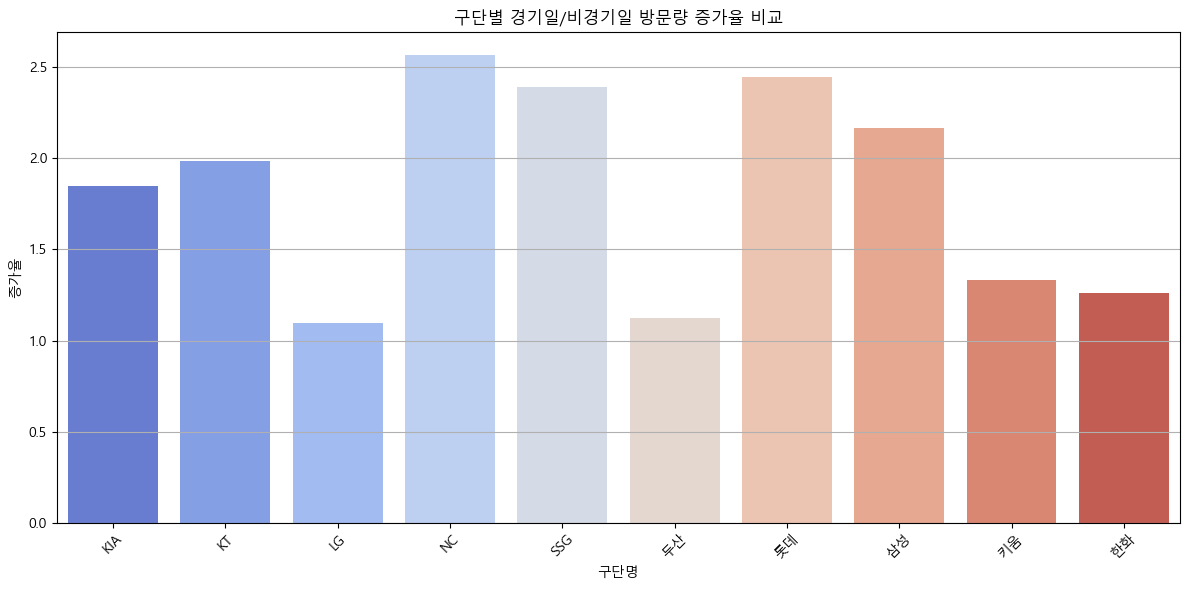

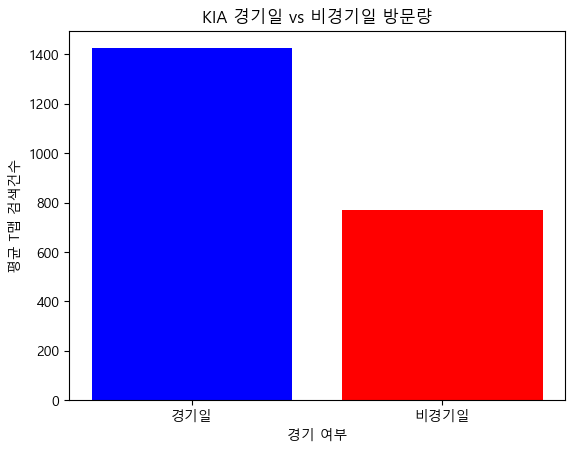

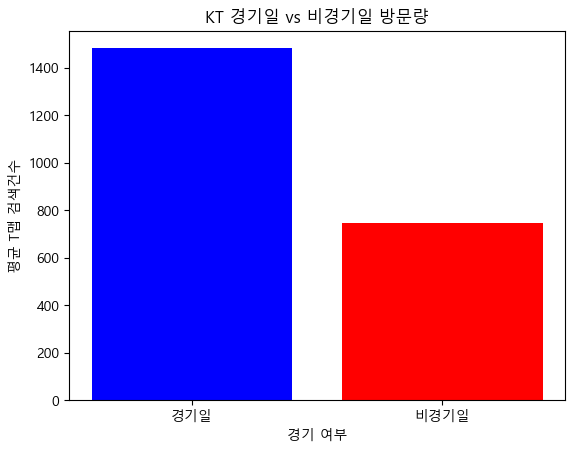

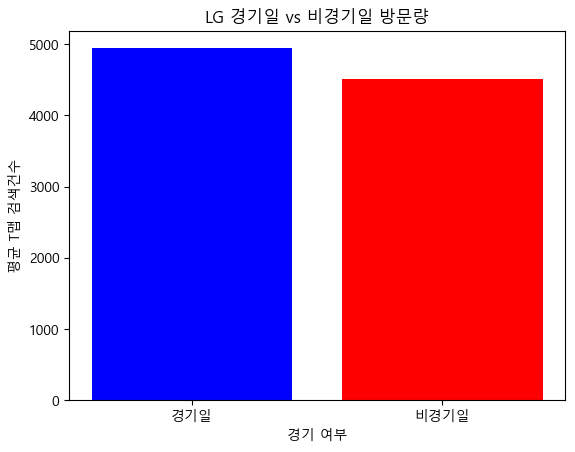

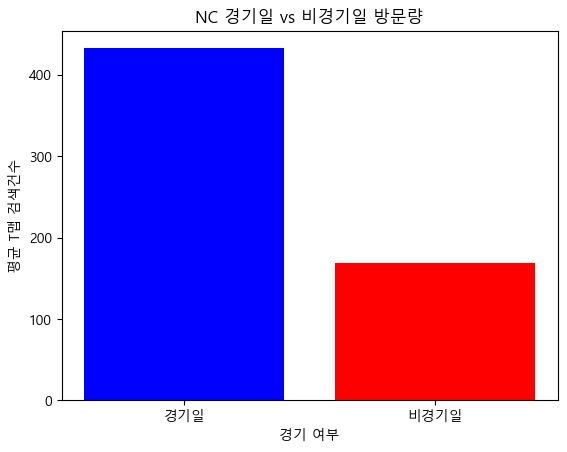

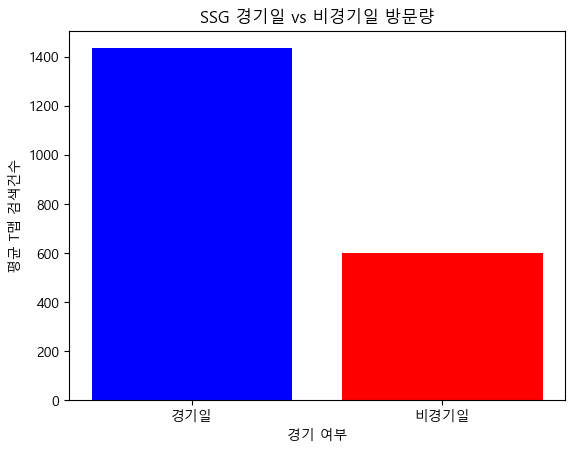

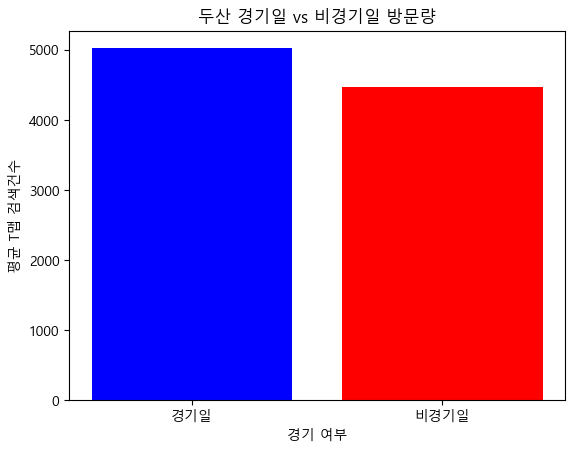

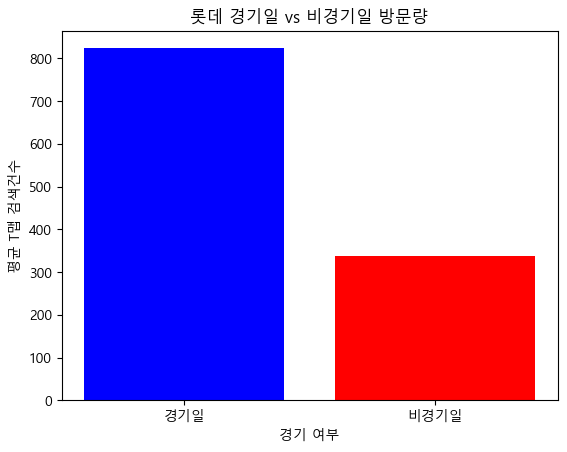

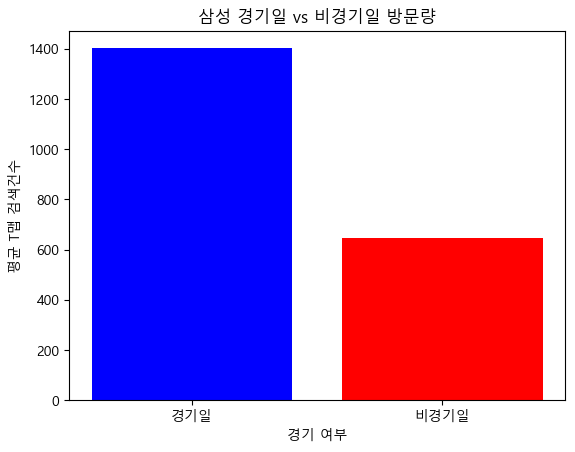

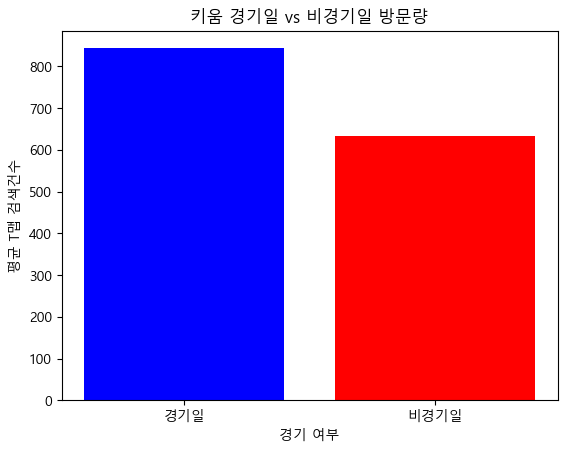

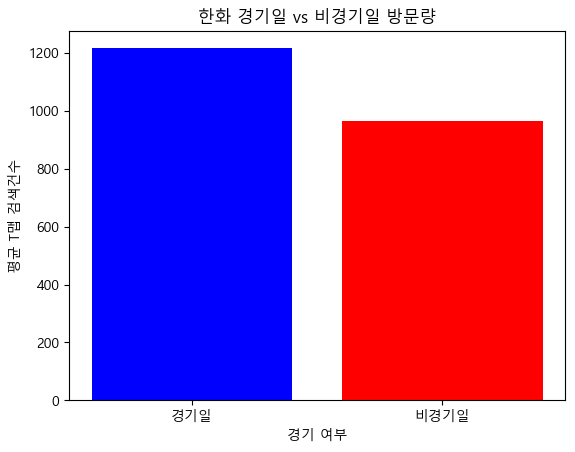

In [119]:
# Í≤ΩÍ∏∞ÏùºÍ≥º Î∞©Î¨∏ÎüâÏùò ÏÉÅÍ¥ÄÏÑ± ÎèÑÏ∂ú
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
ÏãúÏ¶åÍ≤ΩÍ∏∞ = pd.read_excel('ÏãúÏ¶åÍ≤ΩÍ∏∞_Ï†ïÏ†úÏôÑÎ£å.xlsx') 
TÎßµÍ≤ÄÏÉâÍ±¥Ïàò = pd.read_excel('TÎßµÍ≤ÄÏÉâÍ±¥Ïàò.xlsx')  

# TÎßµÍ≤ÄÏÉâÍ±¥Ïàò Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: Ïó¥ÏùÑ ÌñâÏúºÎ°ú Î≥ÄÌôò
TÎßµÍ≤ÄÏÉâÍ±¥Ïàò = TÎßµÍ≤ÄÏÉâÍ±¥Ïàò.melt(id_vars=['ÎÇ†Ïßú'], var_name='Íµ¨Îã®Î™Ö', value_name='TÎßµ Í≤ÄÏÉâÍ±¥Ïàò')

# ÎÇ†ÏßúÏôÄ Íµ¨Îã®Î™ÖÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í≤ΩÍ∏∞Ïùº Ïó¨Î∂Ä ÌåêÎã®
# Îß§Ïπ≠ Îç∞Ïù¥ÌÑ∞Î•º ÎßåÎì§Ïñ¥ Í≤ΩÍ∏∞Ïùº/ÎπÑÍ≤ΩÍ∏∞Ïùº Íµ¨Î∂Ñ
Í≤ΩÍ∏∞_Îß§Ïπ≠ = ÏãúÏ¶åÍ≤ΩÍ∏∞[['ÎÇ†Ïßú', 'Ìôà']].rename(columns={'Ìôà': 'Íµ¨Îã®Î™Ö'})
TÎßµÍ≤ÄÏÉâÍ±¥Ïàò = TÎßµÍ≤ÄÏÉâÍ±¥Ïàò.merge(Í≤ΩÍ∏∞_Îß§Ïπ≠, on=['ÎÇ†Ïßú', 'Íµ¨Îã®Î™Ö'], how='left', indicator=True)
TÎßµÍ≤ÄÏÉâÍ±¥Ïàò['Í≤ΩÍ∏∞Ïó¨Î∂Ä'] = TÎßµÍ≤ÄÏÉâÍ±¥Ïàò['_merge'].apply(lambda x: 'Í≤ΩÍ∏∞Ïùº' if x == 'both' else 'ÎπÑÍ≤ΩÍ∏∞Ïùº')

# Íµ¨Îã®Î≥Ñ Î∞©Î¨∏Îüâ Í≥ÑÏÇ∞: Í≤ΩÍ∏∞Ïùº/ÎπÑÍ≤ΩÍ∏∞Ïùº ÌèâÍ∑†
Íµ¨Îã®Î≥Ñ_Î∞©Î¨∏Îüâ = TÎßµÍ≤ÄÏÉâÍ±¥Ïàò.groupby(['Íµ¨Îã®Î™Ö', 'Í≤ΩÍ∏∞Ïó¨Î∂Ä'])['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò'].mean().reset_index()
Íµ¨Îã®Î≥Ñ_Î∞©Î¨∏Îüâ.rename(columns={'TÎßµ Í≤ÄÏÉâÍ±¥Ïàò': 'ÌèâÍ∑† Í≤ÄÏÉâÍ±¥Ïàò'}, inplace=True)

# Í≤ΩÍ∏∞ÏùºÍ≥º ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ ÎπÑÍµê
Î∞©Î¨∏Îüâ_ÎπÑÍµê = Íµ¨Îã®Î≥Ñ_Î∞©Î¨∏Îüâ.pivot(index='Íµ¨Îã®Î™Ö', columns='Í≤ΩÍ∏∞Ïó¨Î∂Ä', values='ÌèâÍ∑† Í≤ÄÏÉâÍ±¥Ïàò').reset_index()
Î∞©Î¨∏Îüâ_ÎπÑÍµê['Ï¶ùÍ∞ÄÏú®'] = Î∞©Î¨∏Îüâ_ÎπÑÍµê['Í≤ΩÍ∏∞Ïùº'] / Î∞©Î¨∏Îüâ_ÎπÑÍµê['ÎπÑÍ≤ΩÍ∏∞Ïùº']

# Í≤∞Í≥º Ï∂úÎ†•
print("\n=== Íµ¨Îã®Î≥Ñ Í≤ΩÍ∏∞Ïùº/ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ ÎπÑÍµê ===")
print(Î∞©Î¨∏Îüâ_ÎπÑÍµê)

# Íµ¨Îã®Î≥Ñ ÏÑ∏Î∂Ä Î∂ÑÏÑù Ï∂úÎ†•
for idx, row in Î∞©Î¨∏Îüâ_ÎπÑÍµê.iterrows():
    Íµ¨Îã®Î™Ö = row['Íµ¨Îã®Î™Ö']
    Í≤ΩÍ∏∞Ïùº = row['Í≤ΩÍ∏∞Ïùº']
    ÎπÑÍ≤ΩÍ∏∞Ïùº = row['ÎπÑÍ≤ΩÍ∏∞Ïùº']
    Ï¶ùÍ∞ÄÏú® = row['Ï¶ùÍ∞ÄÏú®']
    
    if Ï¶ùÍ∞ÄÏú® >= 2.0:
        Ìï¥ÏÑù = f"{Íµ¨Îã®Î™Ö}ÏùÄ Í≤ΩÍ∏∞ÏùºÏóê Î∞©Î¨∏ÎüâÏù¥ ÎπÑÍ≤ΩÍ∏∞ÏùºÏùò ÏïΩ {Ï¶ùÍ∞ÄÏú®:.2f}Î∞∞Î°ú Ï¶ùÍ∞ÄÌñàÏäµÎãàÎã§. Ïù¥Îäî Í≤ΩÍ∏∞ Ïù¥Î≤§Ìä∏Í∞Ä ÏßÄÏó≠ Î∞©Î¨∏Ïóê Îß§Ïö∞ ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§."
    elif 1.2 <= Ï¶ùÍ∞ÄÏú® < 2.0:
        Ìï¥ÏÑù = f"{Íµ¨Îã®Î™Ö}ÏùÄ Í≤ΩÍ∏∞ÏùºÏóê Î∞©Î¨∏ÎüâÏù¥ ÎπÑÍ≤ΩÍ∏∞Ïùº ÎåÄÎπÑ {Ï¶ùÍ∞ÄÏú®:.2f}Î∞∞Î°ú Ï¶ùÍ∞ÄÌñàÏäµÎãàÎã§. Í≤ΩÍ∏∞ Ïù¥Î≤§Ìä∏Í∞Ä ÏßÄÏó≠ Î∞©Î¨∏ÏùÑ Íæ∏Ï§ÄÌûà Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏäµÎãàÎã§."
    else:
        Ìï¥ÏÑù = f"{Íµ¨Îã®Î™Ö}ÏùÄ Í≤ΩÍ∏∞ÏùºÍ≥º ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ Ï∞®Ïù¥Í∞Ä Ï†ÅÏñ¥ Ï¶ùÍ∞ÄÏú®Ïù¥ {Ï¶ùÍ∞ÄÏú®:.2f}Î∞∞Î°ú ÎÇÆÏäµÎãàÎã§. Ïù¥ÎØ∏ ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏ÎüâÏù¥ ÎÜíÏùÄ ÏßÄÏó≠ÏúºÎ°ú Ï∂îÏ†ïÎê©ÎãàÎã§."
    
    print(f"Íµ¨Îã®Î™Ö: {Íµ¨Îã®Î™Ö}\n"
          f"  - ÌèâÍ∑† Í≤ΩÍ∏∞Ïùº Í≤ÄÏÉâÎüâ: {Í≤ΩÍ∏∞Ïùº:.2f}\n"
          f"  - ÌèâÍ∑† ÎπÑÍ≤ΩÍ∏∞Ïùº Í≤ÄÏÉâÎüâ: {ÎπÑÍ≤ΩÍ∏∞Ïùº:.2f}\n"
          f"  - Ï¶ùÍ∞ÄÏú®: {Ï¶ùÍ∞ÄÏú®:.2f}\n"
          f"  - Ìï¥ÏÑù: {Ìï¥ÏÑù}\n")
# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
sns.barplot(data=Î∞©Î¨∏Îüâ_ÎπÑÍµê, x='Íµ¨Îã®Î™Ö', y='Ï¶ùÍ∞ÄÏú®', palette='coolwarm')
plt.title("Íµ¨Îã®Î≥Ñ Í≤ΩÍ∏∞Ïùº/ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ Ï¶ùÍ∞ÄÏú® ÎπÑÍµê")
plt.xlabel("Íµ¨Îã®Î™Ö")
plt.ylabel("Ï¶ùÍ∞ÄÏú®")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show() 

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

for ÌåÄ in Î∞©Î¨∏Îüâ_ÎπÑÍµê['Íµ¨Îã®Î™Ö']:
    ÌåÄ_Îç∞Ïù¥ÌÑ∞ = TÎßµÍ≤ÄÏÉâÍ±¥Ïàò[TÎßµÍ≤ÄÏÉâÍ±¥Ïàò['Íµ¨Îã®Î™Ö'] == ÌåÄ]
    plt.bar(['Í≤ΩÍ∏∞Ïùº', 'ÎπÑÍ≤ΩÍ∏∞Ïùº'], [
        ÌåÄ_Îç∞Ïù¥ÌÑ∞[ÌåÄ_Îç∞Ïù¥ÌÑ∞['Í≤ΩÍ∏∞Ïó¨Î∂Ä'] == 'Í≤ΩÍ∏∞Ïùº']['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò'].mean(),
        ÌåÄ_Îç∞Ïù¥ÌÑ∞[ÌåÄ_Îç∞Ïù¥ÌÑ∞['Í≤ΩÍ∏∞Ïó¨Î∂Ä'] == 'ÎπÑÍ≤ΩÍ∏∞Ïùº']['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò'].mean()
    ], color=['blue', 'red'])
    plt.title(f'{ÌåÄ} Í≤ΩÍ∏∞Ïùº vs ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏Îüâ')
    plt.xlabel('Í≤ΩÍ∏∞ Ïó¨Î∂Ä')
    plt.ylabel('ÌèâÍ∑† TÎßµ Í≤ÄÏÉâÍ±¥Ïàò')
    plt.show()

Ï£ºÏöî Î∂ÑÏÑù Ìè¨Ïù∏Ìä∏

1. Ï¶ùÍ∞ÄÏú®Ïù¥ ÎÜíÏùÄ Íµ¨Îã®Îì§ (NC, Î°ØÎç∞, SSG):
Í≤ΩÍ∏∞ÏùºÏóê Î∞©Î¨∏ÎüâÏù¥ ÏïΩ 2.4Î∞∞ÏóêÏÑú 2.57Î∞∞Î°ú Ï¶ùÍ∞Ä.
Ïù¥Îäî Í≤ΩÍ∏∞Í∞Ä ÏßÄÏó≠ Î∞©Î¨∏ ÌôúÏÑ±ÌôîÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§å.
NCÏùò Í≤ΩÏö∞ ÌèâÍ∑† Î∞©Î¨∏ÎüâÏù¥ Ï†ÅÏùÄ ÏÉÅÌÉúÏóêÏÑú Í≤ΩÍ∏∞ÏùºÏóê ÌÅ¨Í≤å Ï¶ùÍ∞ÄÌïòÎØÄÎ°ú Í≤ΩÍ∏∞Ïùò ÏùòÏ°¥ÎèÑÍ∞Ä ÎÜíÏùÄ ÏßÄÏó≠Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨Îã§.

2. Ï¶ùÍ∞ÄÏú®Ïù¥ ÎÇÆÏùÄ Íµ¨Îã®Îì§ (LG, ÎëêÏÇ∞):
LGÏôÄ ÎëêÏÇ∞ÏùÄ Ï¶ùÍ∞ÄÏú®Ïù¥ 1.1Î∞∞ ÏàòÏ§ÄÏúºÎ°ú Îß§Ïö∞ ÎÇÆÏùå.
ÎπÑÍ≤ΩÍ∏∞Ïùº Î∞©Î¨∏ÎüâÏù¥ Ïù¥ÎØ∏ ÎÜíÏïÑ Í≤ΩÍ∏∞ÏùºÏóê ÏÉÅÎåÄÏ†Å Ï¶ùÍ∞ÄÌè≠Ïù¥ Ï†ÅÏñ¥ Î≥¥Ïùº Í∞ÄÎä•ÏÑ±.
ÏÑúÏö∏ ÏßÄÏó≠Ïù¥ÎùºÎäî ÌäπÏÑ±ÏÉÅ, Í∏∞ÌÉÄ ÏöîÏù∏(ÏÉÅÍ∂å, Í¥ÄÍ¥ëÏßÄ, ÎåÄÍ∑úÎ™® Ïù∏ÌîÑÎùº) Îì±Ïù¥ Ïù¥ÎØ∏ Î∞©Î¨∏ÎüâÏùÑ Ïú†ÏßÄÌïòÍ≥† ÏûàÏùÑ Ïàò ÏûàÎã§.

3. Ï¶ùÍ∞ÄÏú®Ïù¥ Ï§ëÍ∞ÑÏù∏ Íµ¨Îã®Îì§ (KIA, KT, ÏÇºÏÑ±, ÌïúÌôî, ÌÇ§ÏõÄ):
Ïù¥ Íµ¨Îã®Îì§ÏùÄ ÌèâÍ∑†Ï†ÅÏúºÎ°ú 1.2Î∞∞ÏóêÏÑú 2Î∞∞ ÏÇ¨Ïù¥Ïùò Ï¶ùÍ∞ÄÏú®ÏùÑ Î≥¥ÏûÑ.
Í≤ΩÍ∏∞ÏùºÍ≥º ÎπÑÍ≤ΩÍ∏∞ÏùºÏùò Î∞©Î¨∏Îüâ Ï∞®Ïù¥Í∞Ä Î™ÖÌôïÌïòÎ©∞, Íµ¨Îã® Í≤ΩÍ∏∞Í∞Ä ÏßÄÏó≠ Î∞©Î¨∏ÎüâÏùÑ Íæ∏Ï§ÄÌûà Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.

In [122]:
# Í≤ΩÍ∏∞ ÏãúÏ¶å Ï†ÑÌõÑÎ°ú ÏßÄÏó≠Îß§Ï∂ú ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù

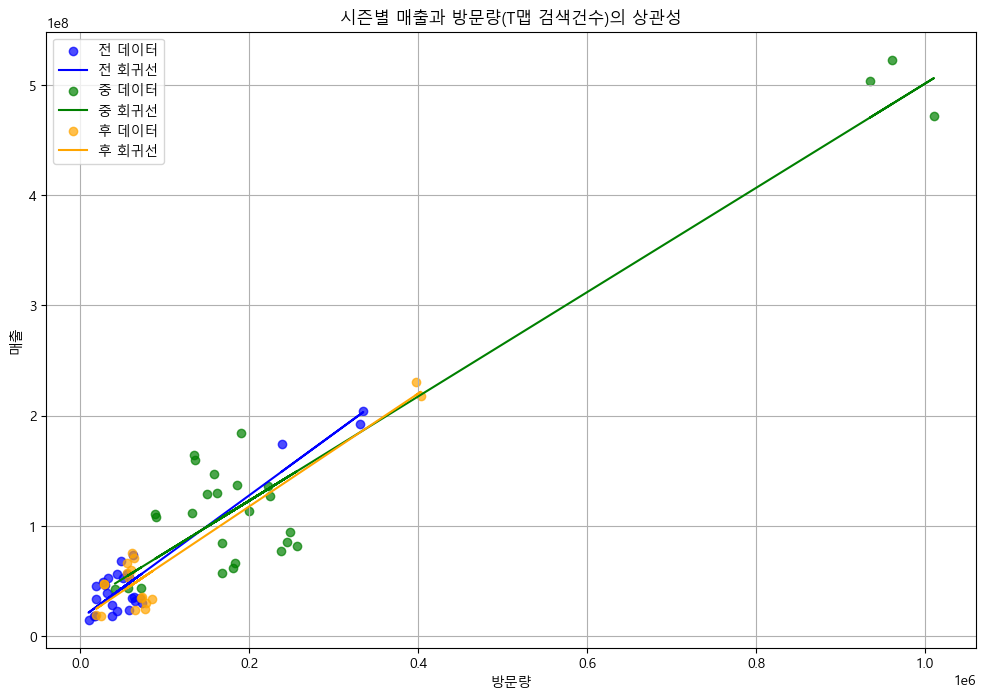


=== ÏãúÏ¶åÎ≥Ñ Îß§Ï∂úÍ≥º TÎßµ Í≤ÄÏÉâÍ±¥Ïàò ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù Í≤∞Í≥º ===
  ÏãúÏ¶å  ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)       p-value                                  ÌöåÍ∑ÄÏãù
0  Ï†Ñ  0.945358  1.129023e-13  Îß§Ï∂ú = 559.35 * TÎßµ Í≤ÄÏÉâÍ±¥Ïàò + 15913770.64
1  Ï§ë  0.944734  1.296874e-13  Îß§Ï∂ú = 472.93 * TÎßµ Í≤ÄÏÉâÍ±¥Ïàò + 28325566.80
2  ÌõÑ  0.946826  2.718412e-09  Îß§Ï∂ú = 512.15 * TÎßµ Í≤ÄÏÉâÍ±¥Ïàò + 15263802.69


In [127]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = 'Í¥ÄÍ¥ëÏßÄÏ∂úÏï°.xlsx'  # ÌååÏùº Í≤ΩÎ°úÎ•º ÏàòÏ†ïÌïòÏÑ∏Ïöî.
data = pd.read_excel(file_path, sheet_name='ÏßÄÏó≠Î≥ÑÍ¥ÄÍ¥ëÏßÄÏ∂úÏï°')

# 'ÎÖÑÎèÑ ÏãúÏ¶å Ï†Ñ/Ï§ë/ÌõÑ'ÏóêÏÑú 'Ï†Ñ', 'Ï§ë', 'ÌõÑ'Îßå Ï∂îÏ∂ú
data['ÏãúÏ¶å_Íµ¨Î∂Ñ'] = data['ÏãúÏ¶å'].str.extract(r'(Ï†Ñ|Ï§ë|ÌõÑ)')

# ÏÉâÏÉÅ Ï†ïÏùò (ÏãúÏ¶åÎ≥ÑÎ°ú Íµ¨Î∂Ñ)
colors = {'Ï†Ñ': 'blue', 'Ï§ë': 'green', 'ÌõÑ': 'orange'}

# Í∑∏ÎûòÌîÑ Ï¥àÍ∏∞Ìôî
plt.figure(figsize=(12, 8))

# ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
results = []

# Í∞Å ÏãúÏ¶å(Ï†Ñ, Ï§ë, ÌõÑ)Î≥ÑÎ°ú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
for season in data['ÏãúÏ¶å_Íµ¨Î∂Ñ'].unique():
    season_data = data[data['ÏãúÏ¶å_Íµ¨Î∂Ñ'] == season]

    # Îç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ Ïä§ÌÇµ
    if len(season_data) < 2:
        print(f"Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°± - ÏãúÏ¶å: {season}, Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(season_data)}")
        continue

    # ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù
    slope, intercept, r_value, p_value, std_err = linregress(
        season_data['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò'], season_data['Îß§Ï∂ú']
    )

    # Í≤∞Í≥º Ï†ÄÏû•
    results.append({
        'ÏãúÏ¶å': season,
        'ÏÉÅÍ¥ÄÍ≥ÑÏàò (r)': r_value,
        'p-value': p_value,
        'ÌöåÍ∑ÄÏãù': f"Îß§Ï∂ú = {slope:.2f} * TÎßµ Í≤ÄÏÉâÍ±¥Ïàò + {intercept:.2f}"
    })

    # ÏÇ∞Ï†êÎèÑ Ï∂îÍ∞Ä
    plt.scatter(season_data['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò'], season_data['Îß§Ï∂ú'], alpha=0.7,
                label=f'{season} Îç∞Ïù¥ÌÑ∞', color=colors[season])
    
    # ÌöåÍ∑ÄÏÑ† Ï∂îÍ∞Ä
    x_vals = season_data['TÎßµ Í≤ÄÏÉâÍ±¥Ïàò']
    y_vals = slope * x_vals + intercept
    plt.plot(x_vals, y_vals, color=colors[season], label=f'{season} ÌöåÍ∑ÄÏÑ†')

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title("ÏãúÏ¶åÎ≥Ñ Îß§Ï∂úÍ≥º Î∞©Î¨∏Îüâ(TÎßµ Í≤ÄÏÉâÍ±¥Ïàò)Ïùò ÏÉÅÍ¥ÄÏÑ±")
plt.xlabel("Î∞©Î¨∏Îüâ")
plt.ylabel("Îß§Ï∂ú")
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.show()

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ïÎ¶¨
results_df = pd.DataFrame(results)

# Í≤∞Í≥º Ï∂úÎ†•
print("\n=== ÏãúÏ¶åÎ≥Ñ Îß§Ï∂úÍ≥º TÎßµ Í≤ÄÏÉâÍ±¥Ïàò ÏÉÅÍ¥ÄÏÑ± Î∂ÑÏÑù Í≤∞Í≥º ===")
print(results_df)
#     # Í≤∞Í≥º ÏóëÏÖÄ Ï†ÄÏû•
#     results_df.to_excel('ÏãúÏ¶åÎ≥Ñ_Îß§Ï∂ú_ÏÉÅÍ¥ÄÏÑ±_Î∂ÑÏÑù_Í≤∞Í≥º.xlsx', index=False)

ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Î™®Îëê 0.94 Ïù¥ÏÉÅÏúºÎ°ú Îß§Ïö∞ ÎÜíÏäµÎãàÎã§. Ïù¥Îäî TÎßµ Í≤ÄÏÉâÍ±¥ÏàòÏôÄ Îß§Ï∂ú Í∞ÑÏóê Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.

Î™®Îì† ÏãúÏ¶åÏóêÏÑú 
ùëù
<
0.05
p<0.05Î°ú ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏùå.
ÌäπÌûà, 
ùëù
p Í∞íÏù¥ Í∑πÎèÑÎ°ú ÏûëÏïÑ(Ïòà: 
1
0
‚àí
13
10 
‚àí13
  ÏàòÏ§Ä) TÎßµ Í≤ÄÏÉâÍ±¥ÏàòÍ∞Ä Îß§Ï∂úÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ï§ëÏöîÌïú ÏöîÏù∏ÏûÑÏùÑ Í∞ïÎ†•Ìûà ÏãúÏÇ¨Ìï©ÎãàÎã§.

Î∂ÑÏÑù ÎÇ¥Ïö©

- Î™®Îì† p-valueÍ∞Ä 0.05 Ïù¥ÌïòÎ°ú, ÏÉÅÍ¥ÄÏÑ±Ïù¥ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏ÌïòÎã§.
- ÌäπÌûà Ï†ÑÍ≥º Ï§ë ÏãúÏ¶åÏùÄ p-valueÍ∞Ä Îß§Ïö∞ ÏûëÏïÑ, Îç∞Ïù¥ÌÑ∞Í∞Ä Îëê Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥ÑÎ•º Í∞ïÎ†•Ìûà Îí∑Î∞õÏπ® ÎêúÎã§.

- ÌöåÍ∑ÄÏãù Î∂ÑÏÑùÍ≤∞Í≥º ÏãúÏ¶å 'Ï†Ñ'Í≥º 'ÌõÑ'Îäî Í∏∞Î≥∏ Îß§Ï∂ú ÏïΩ 1500Îßå Ïõê ÏàòÏ§ÄÏù¥Îã§. (Ï†Ñ:1591Îßå Ïõê, ÌõÑ:1526Îßå Ïõê) 
Î∞òÎ©¥ ÏãúÏ¶å 'Ï§ë'ÏóêÎäî Í∏∞Î≥∏ Îß§Ï∂ú ÏïΩ 2832Îßå ÏõêÏúºÎ°ú, ÏãúÏ¶å Ï§ë Î∞©Î¨∏Îüâ Ï¶ùÍ∞ÄÏóê Îî∞Îùº Í∏∞Î≥∏ Îß§Ï∂úÏù¥ Îçî ÎÜíÏùÄ ÏÉÅÌÉúÏûÑÏùÑ ÎÇòÌÉÄÎÇ∏Îã§.

Í≤∞Î°†
- ÏãúÏ¶å Ï§ëÏóêÎäî Îß§Ï∂ú Ï¶ùÍ∞ÄÏú®ÏùÄ ÎÇÆÏßÄÎßå, Í∏∞Î≥∏ Îß§Ï∂úÏù¥ Í∞ÄÏû• ÎÜíÏïÑ Î∞©Î¨∏Îüâ Ï¶ùÍ∞ÄÏùò Í∏∞Î∞ò Ìö®Í≥ºÍ∞Ä ÎëêÎìúÎü¨ÏßÑÎã§.